In [105]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "consumer-electronics-sales-dataset"

# **Import**

In [106]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)

# **1. Data Import & EDA**

In [107]:
data <- read.csv('/kaggle/input/consumer-electronics-sales-dataset/consumer_electronics_sales_data.csv')

**Data Dictionary:**
>**ProductID: Unique identifier for each product.**   
>**ProductCategory: Category of the consumer electronics product (e.g., Smartphones, Laptops).**   
>**ProductBrand: Brand of the product (e.g., Apple, Samsung).**   
>**ProductPrice: Price of the product ($).**   
>**CustomerAge: Age of the customer.**   
>**CustomerGender: Gender of the customer (0 - Male, 1 - Female).**   
>**PurchaseFrequency: Average number of purchases per year.**   
>**CustomerSatisfaction: Customer satisfaction rating (1 - 5).**   
>**PurchaseIntent (Target Variable): Intent to purchase.**   

In [108]:
dim(data)

[1] 9000    9

In [109]:
str(data)

'data.frame':	9000 obs. of  9 variables:
 $ ProductID           : int  5874 5875 5876 5877 5878 5879 5880 5881 5882 5883 ...
 $ ProductCategory     : chr  "Smartphones" "Smart Watches" "Tablets" "Smartphones" ...
 $ ProductBrand        : chr  "Other Brands" "Samsung" "Samsung" "Samsung" ...
 $ ProductPrice        : num  313 980 2607 870 1799 ...
 $ CustomerAge         : int  18 35 63 63 57 37 26 35 19 66 ...
 $ CustomerGender      : int  0 1 0 1 0 1 1 0 1 1 ...
 $ PurchaseFrequency   : int  2 7 1 10 17 8 5 12 3 8 ...
 $ CustomerSatisfaction: int  1 2 5 3 3 1 5 5 4 4 ...
 $ PurchaseIntent      : int  0 1 1 1 0 1 1 1 1 1 ...


In [110]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ProductID,1,9000,1.037350e+04,2598.2205449,10373.500,1.037350e+04,3335.8500,5874.0000,14873.000,8999.000,0.000000000,-1.200400,27.387649285
ProductCategory*,2,9000,3.006778e+00,1.4028762,3.000,3.008472e+00,1.4826,1.0000,5.000,4.000,-0.004552306,-1.284733,0.014787614
ProductBrand*,3,9000,3.010444e+00,1.4092947,3.000,3.013056e+00,1.4826,1.0000,5.000,4.000,-0.011354444,-1.296584,0.014855271
ProductPrice,4,9000,1.527429e+03,829.9008980,1513.025,1.523741e+03,1064.2878,100.3764,2999.852,2899.476,0.029066892,-1.188787,8.747923567
CustomerAge,5,9000,4.334700e+01,15.0550839,43.000,4.332958e+01,19.2738,18.0000,69.000,51.000,0.003518528,-1.213198,0.158694519
CustomerGender,6,9000,5.088889e-01,0.4999488,1.000,5.111111e-01,0.0000,0.0000,1.000,1.000,-0.035555249,-1.998958,0.005269923
PurchaseFrequency,7,9000,1.005467e+01,5.4613280,10.000,1.005903e+01,7.4130,1.0000,19.000,18.000,-0.001467866,-1.202973,0.057567452
CustomerSatisfaction,8,9000,2.996000e+00,1.4053007,3.000,2.995000e+00,1.4826,1.0000,5.000,4.000,0.004694725,-1.283463,0.014813170
PurchaseIntent,9,9000,5.664444e-01,0.4955930,1.000,5.830556e-01,0.0000,0.0000,1.000,1.000,-0.268111378,-1.928331,0.005224009


In [111]:
summary(data)

   ProductID     ProductCategory    ProductBrand        ProductPrice   
 Min.   : 5874   Length:9000        Length:9000        Min.   : 100.4  
 1st Qu.: 8124   Class :character   Class :character   1st Qu.: 809.2  
 Median :10374   Mode  :character   Mode  :character   Median :1513.0  
 Mean   :10374                                         Mean   :1527.4  
 3rd Qu.:12623                                         3rd Qu.:2244.4  
 Max.   :14873                                         Max.   :2999.9  
  CustomerAge    CustomerGender   PurchaseFrequency CustomerSatisfaction
 Min.   :18.00   Min.   :0.0000   Min.   : 1.00     Min.   :1.000       
 1st Qu.:30.00   1st Qu.:0.0000   1st Qu.: 5.00     1st Qu.:2.000       
 Median :43.00   Median :1.0000   Median :10.00     Median :3.000       
 Mean   :43.35   Mean   :0.5089   Mean   :10.05     Mean   :2.996       
 3rd Qu.:56.00   3rd Qu.:1.0000   3rd Qu.:15.00     3rd Qu.:4.000       
 Max.   :69.00   Max.   :1.0000   Max.   :19.00     Max.  

**Check missing value**

In [112]:
colSums(is.na(data))

ProductID      ProductCategory         ProductBrand 
                   0                    0                    0 
        ProductPrice          CustomerAge       CustomerGender 
                   0                    0                    0 
   PurchaseFrequency CustomerSatisfaction       PurchaseIntent 
                   0                    0                    0

**duplicate check**

In [113]:
sum(duplicated(data))

[1] 0

In [114]:
head(data)

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,5874,Smartphones,Other Brands,312.9497,18,0,2,1,0
2,5875,Smart Watches,Samsung,980.3894,35,1,7,2,1
3,5876,Tablets,Samsung,2606.7183,63,0,1,5,1
4,5877,Smartphones,Samsung,870.3955,63,1,10,3,1
5,5878,Tablets,Sony,1798.9559,57,0,17,3,0
6,5879,Smartphones,Samsung,373.1483,37,1,8,1,1


# **2. Data Visualization**

In [115]:
options(repr.plot.width = 16.0, repr.plot.height = 24.0)

**Histogram**

In [116]:
a <- ggplot(data) + 
        geom_histogram(aes(x=ProductPrice), fill = 'red', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'ProductPrice Histogram', x = 'ProductPrice', y = 'Count') + 
        theme_bw()

b <- ggplot(data) + 
        geom_histogram(aes(x=CustomerAge), fill = 'orange', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'CustomerAge Histogram', x = 'CustomerAge', y = 'Count') + 
        theme_bw()

c <- ggplot(data) + 
        geom_histogram(aes(x=CustomerGender), fill = 'yellow', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'CustomerGender Histogram', x = 'CustomerGender', y = 'Count') + 
        theme_bw()

d <- ggplot(data) + 
        geom_histogram(aes(x=PurchaseFrequency), fill = 'green', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'PurchaseFrequency Histogram', x = 'PurchaseFrequency', y = 'Count') + 
        theme_bw()

e <- ggplot(data) + 
        geom_histogram(aes(x=CustomerSatisfaction), fill = 'blue', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'CustomerSatisfaction Histogram', x = 'CustomerSatisfaction', y = 'Count') + 
        theme_bw()

f <- ggplot(data) + 
        geom_histogram(aes(x=PurchaseIntent), fill = 'violet', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'PurchaseIntent Histogram', x = 'PurchaseIntent', y = 'Count') + 
        theme_bw()

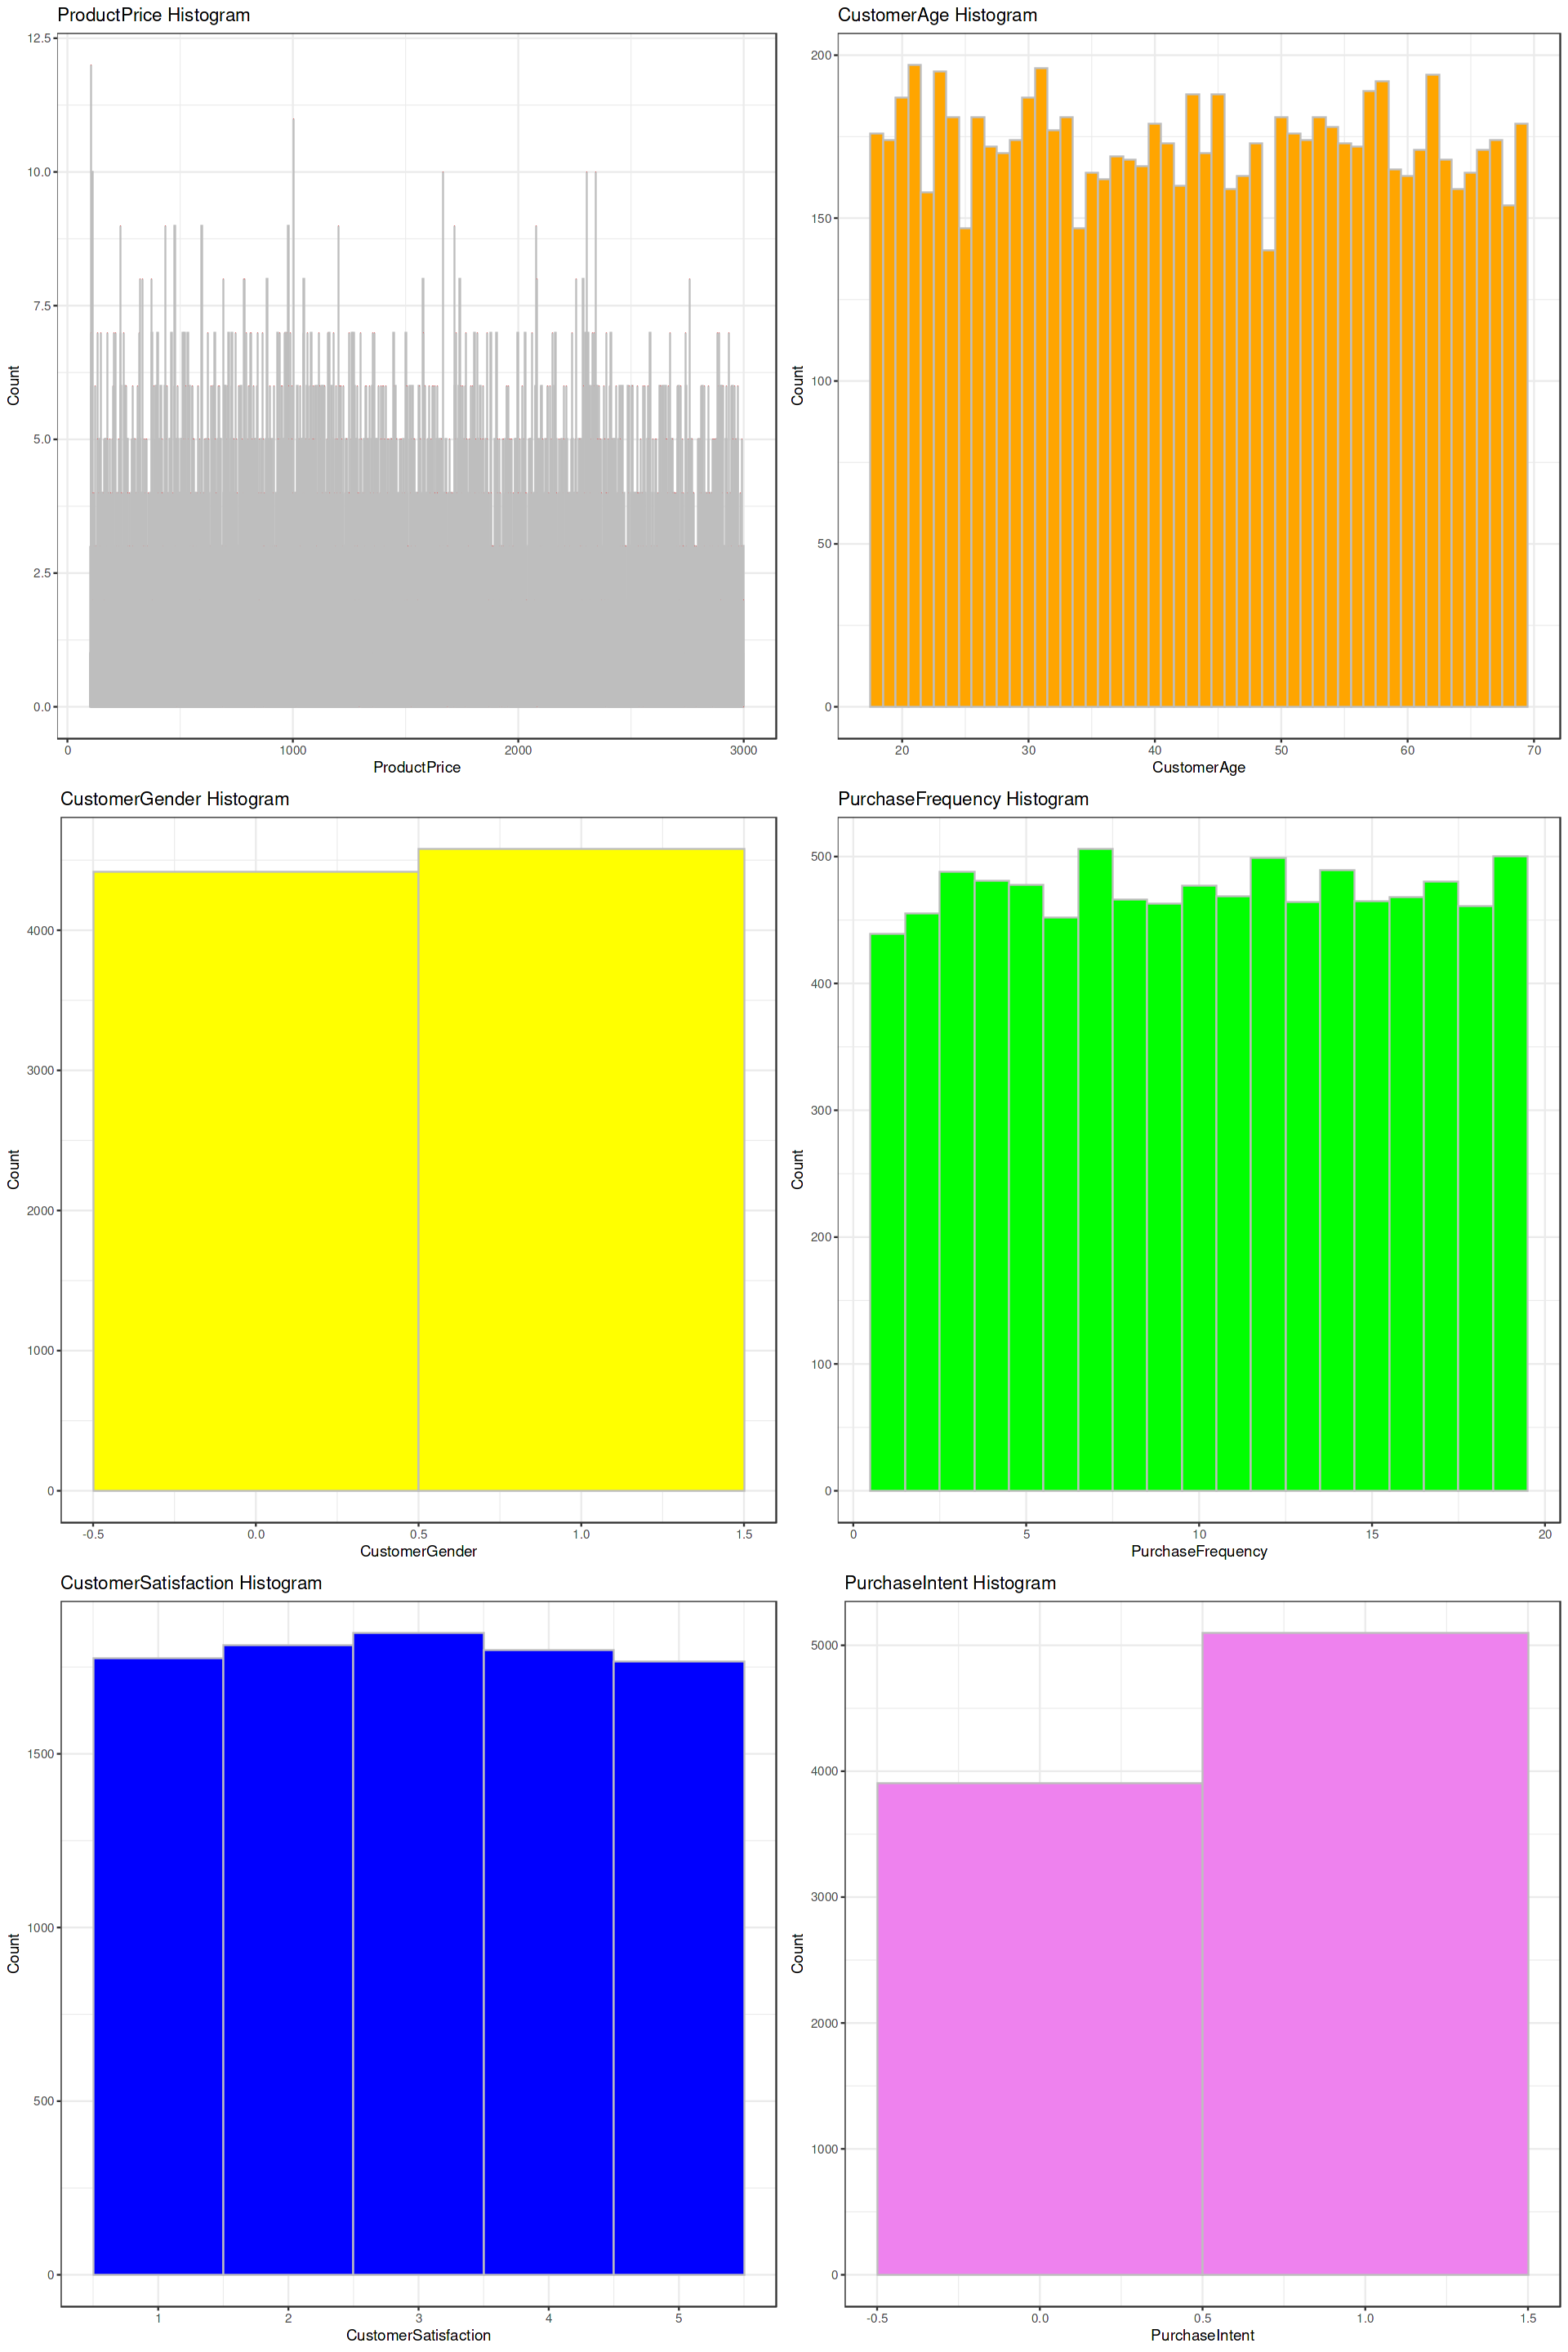

In [117]:
grid.arrange(a,b,c,d,e,f, ncol = 2)

**Count Plot**

In [118]:
a <- ggplot(data) +     
    geom_bar(aes(x=ProductCategory , fill = ProductCategory)) +   
    theme_bw() +
    ggtitle('ProductCategory Count') + 
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1 , angle = 45),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

b <- ggplot(data) +     
    geom_bar(aes(x=ProductBrand , fill = ProductBrand)) +   
    theme_bw() +
    ggtitle('ProductBrand Count') + 
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1 , angle = 45),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

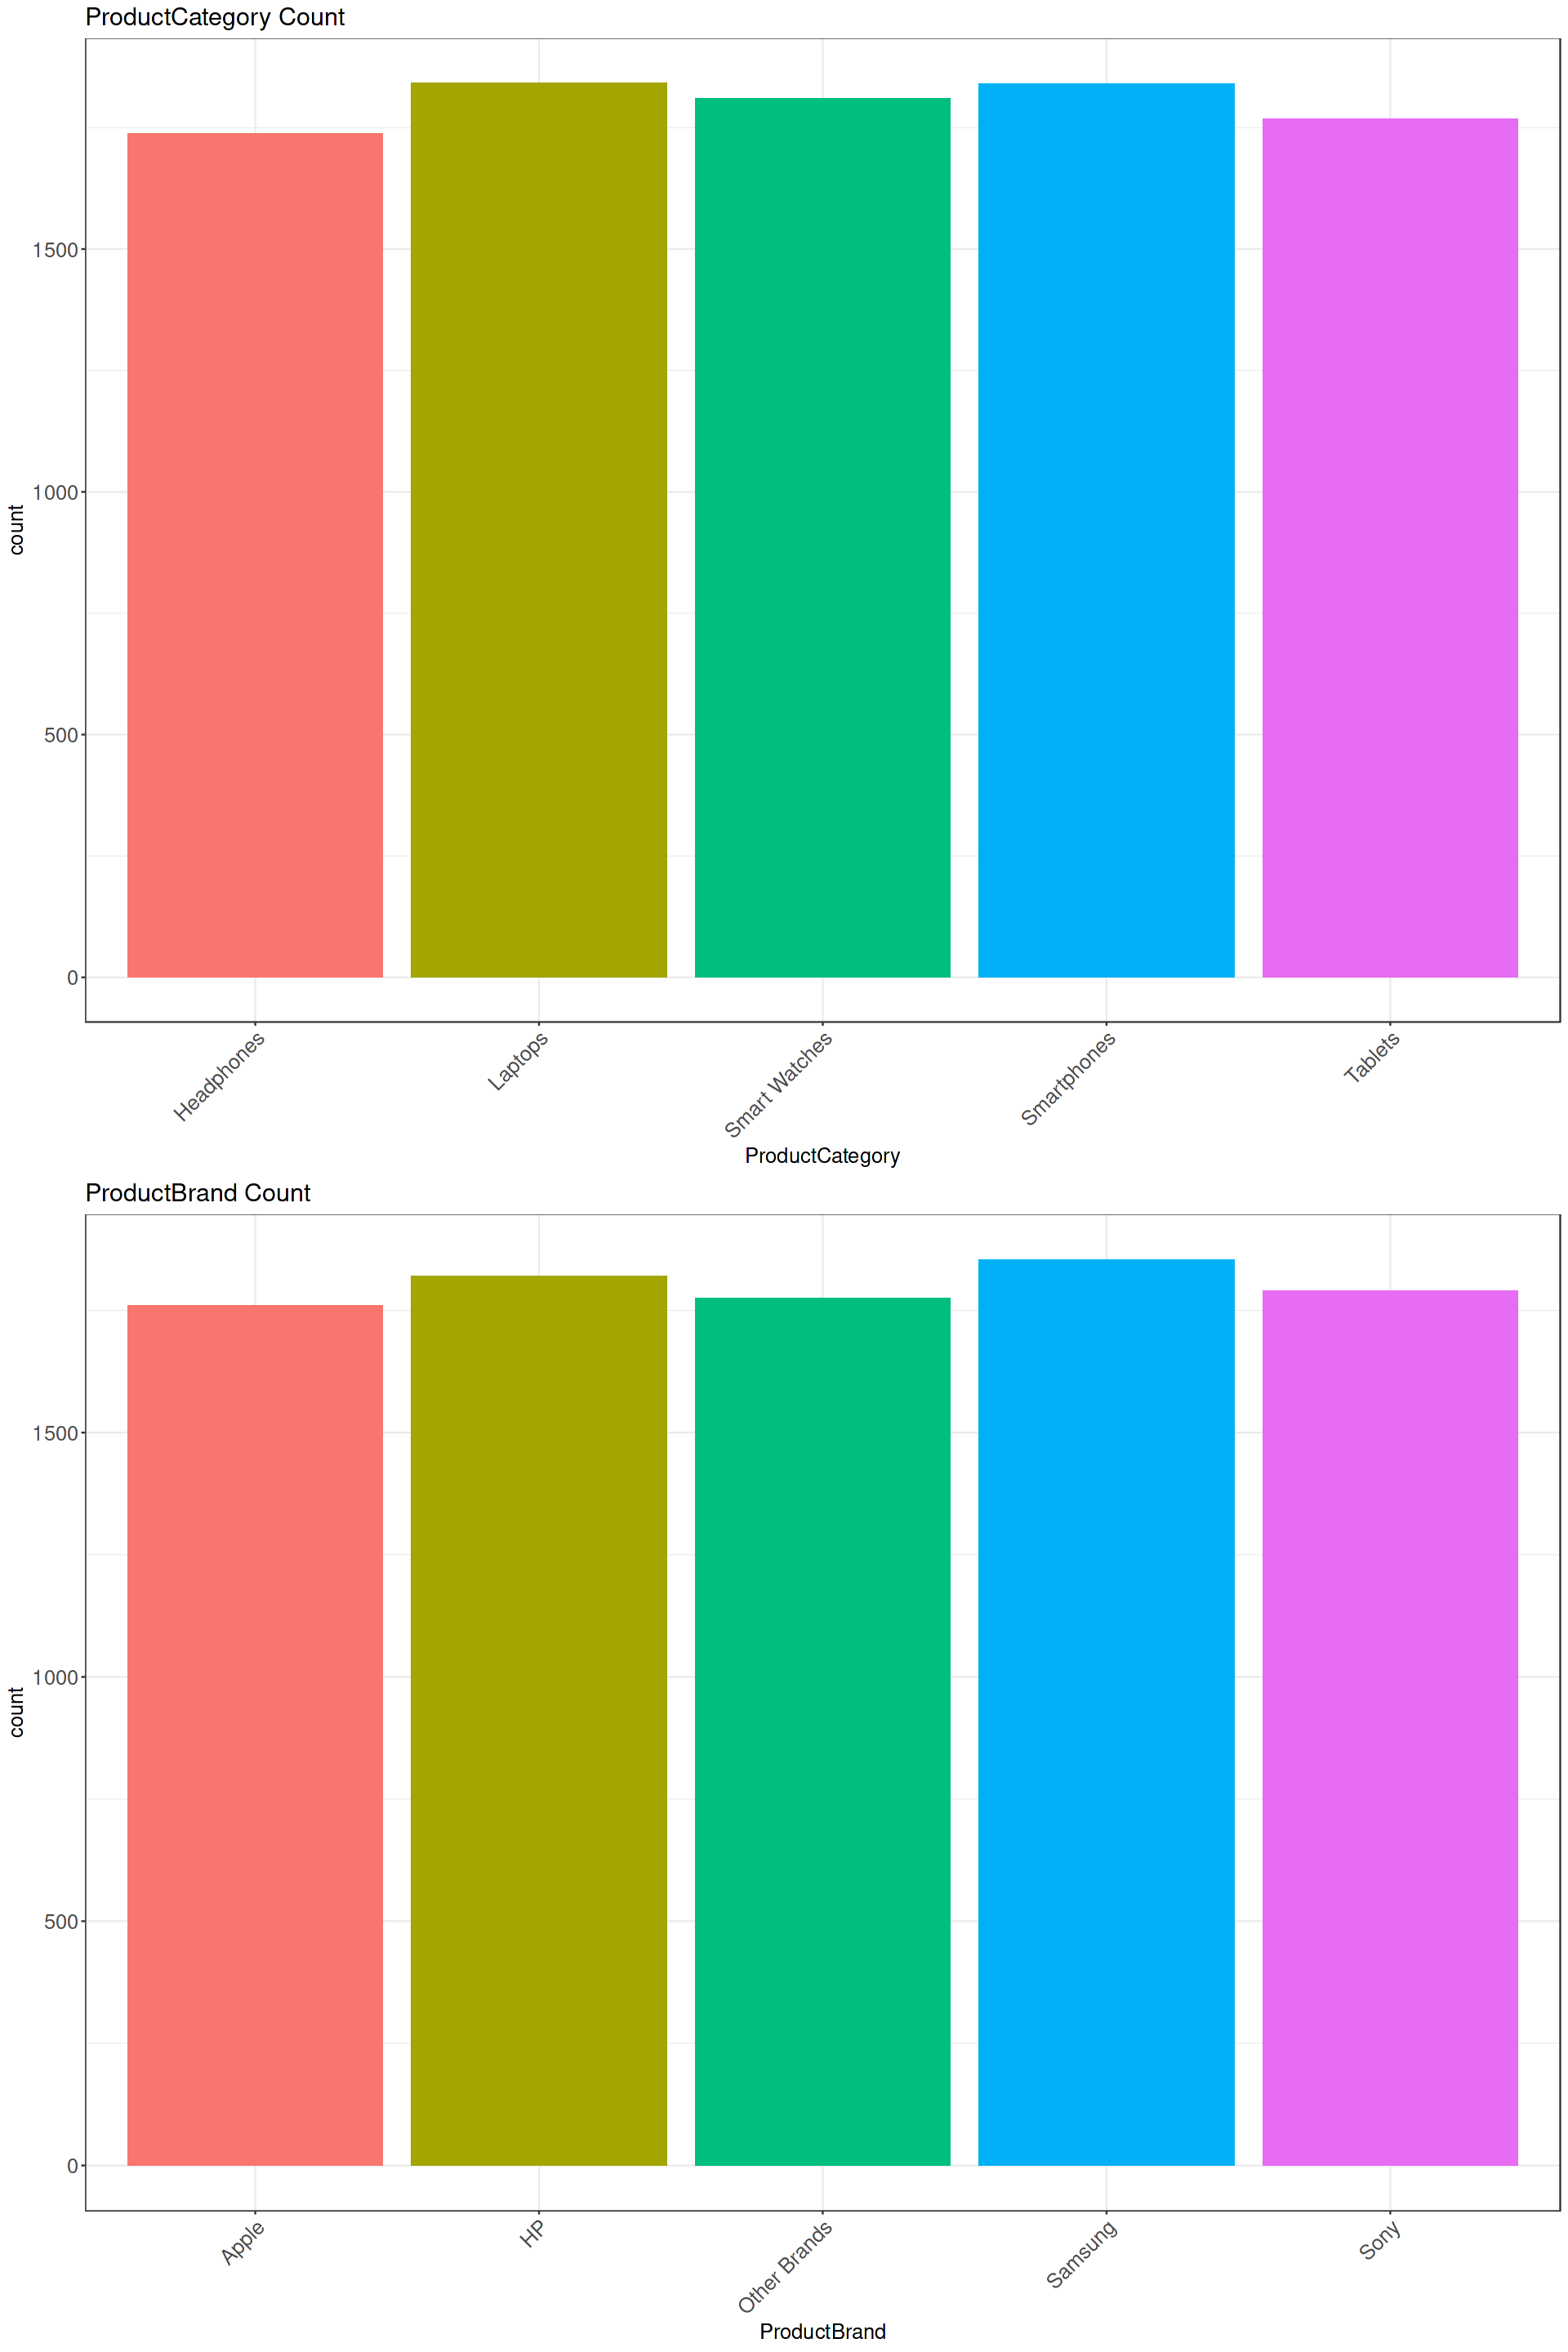

In [119]:
grid.arrange(a,b, ncol = 1)

**Categorical Variables by purchaseIntent**

In [120]:
options(repr.plot.width = 16.0, repr.plot.height = 20.0)

In [121]:
a <- ggplot(data) + geom_bar(aes(x= ProductCategory , fill = factor(PurchaseIntent)), position = 'dodge') +
    theme_bw() +
    ggtitle('ProductCategory by purchaseIntent') + 
    labs(fill = 'PurchaseIntent') +
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1 , angle = 45),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

b <- ggplot(data) + geom_bar(aes(x= ProductBrand , fill = factor(PurchaseIntent)), position = 'dodge') +
    theme_bw() +
    ggtitle('ProductBrand by purchaseIntent') + 
    labs(fill = 'PurchaseIntent') +
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1 , angle = 45),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

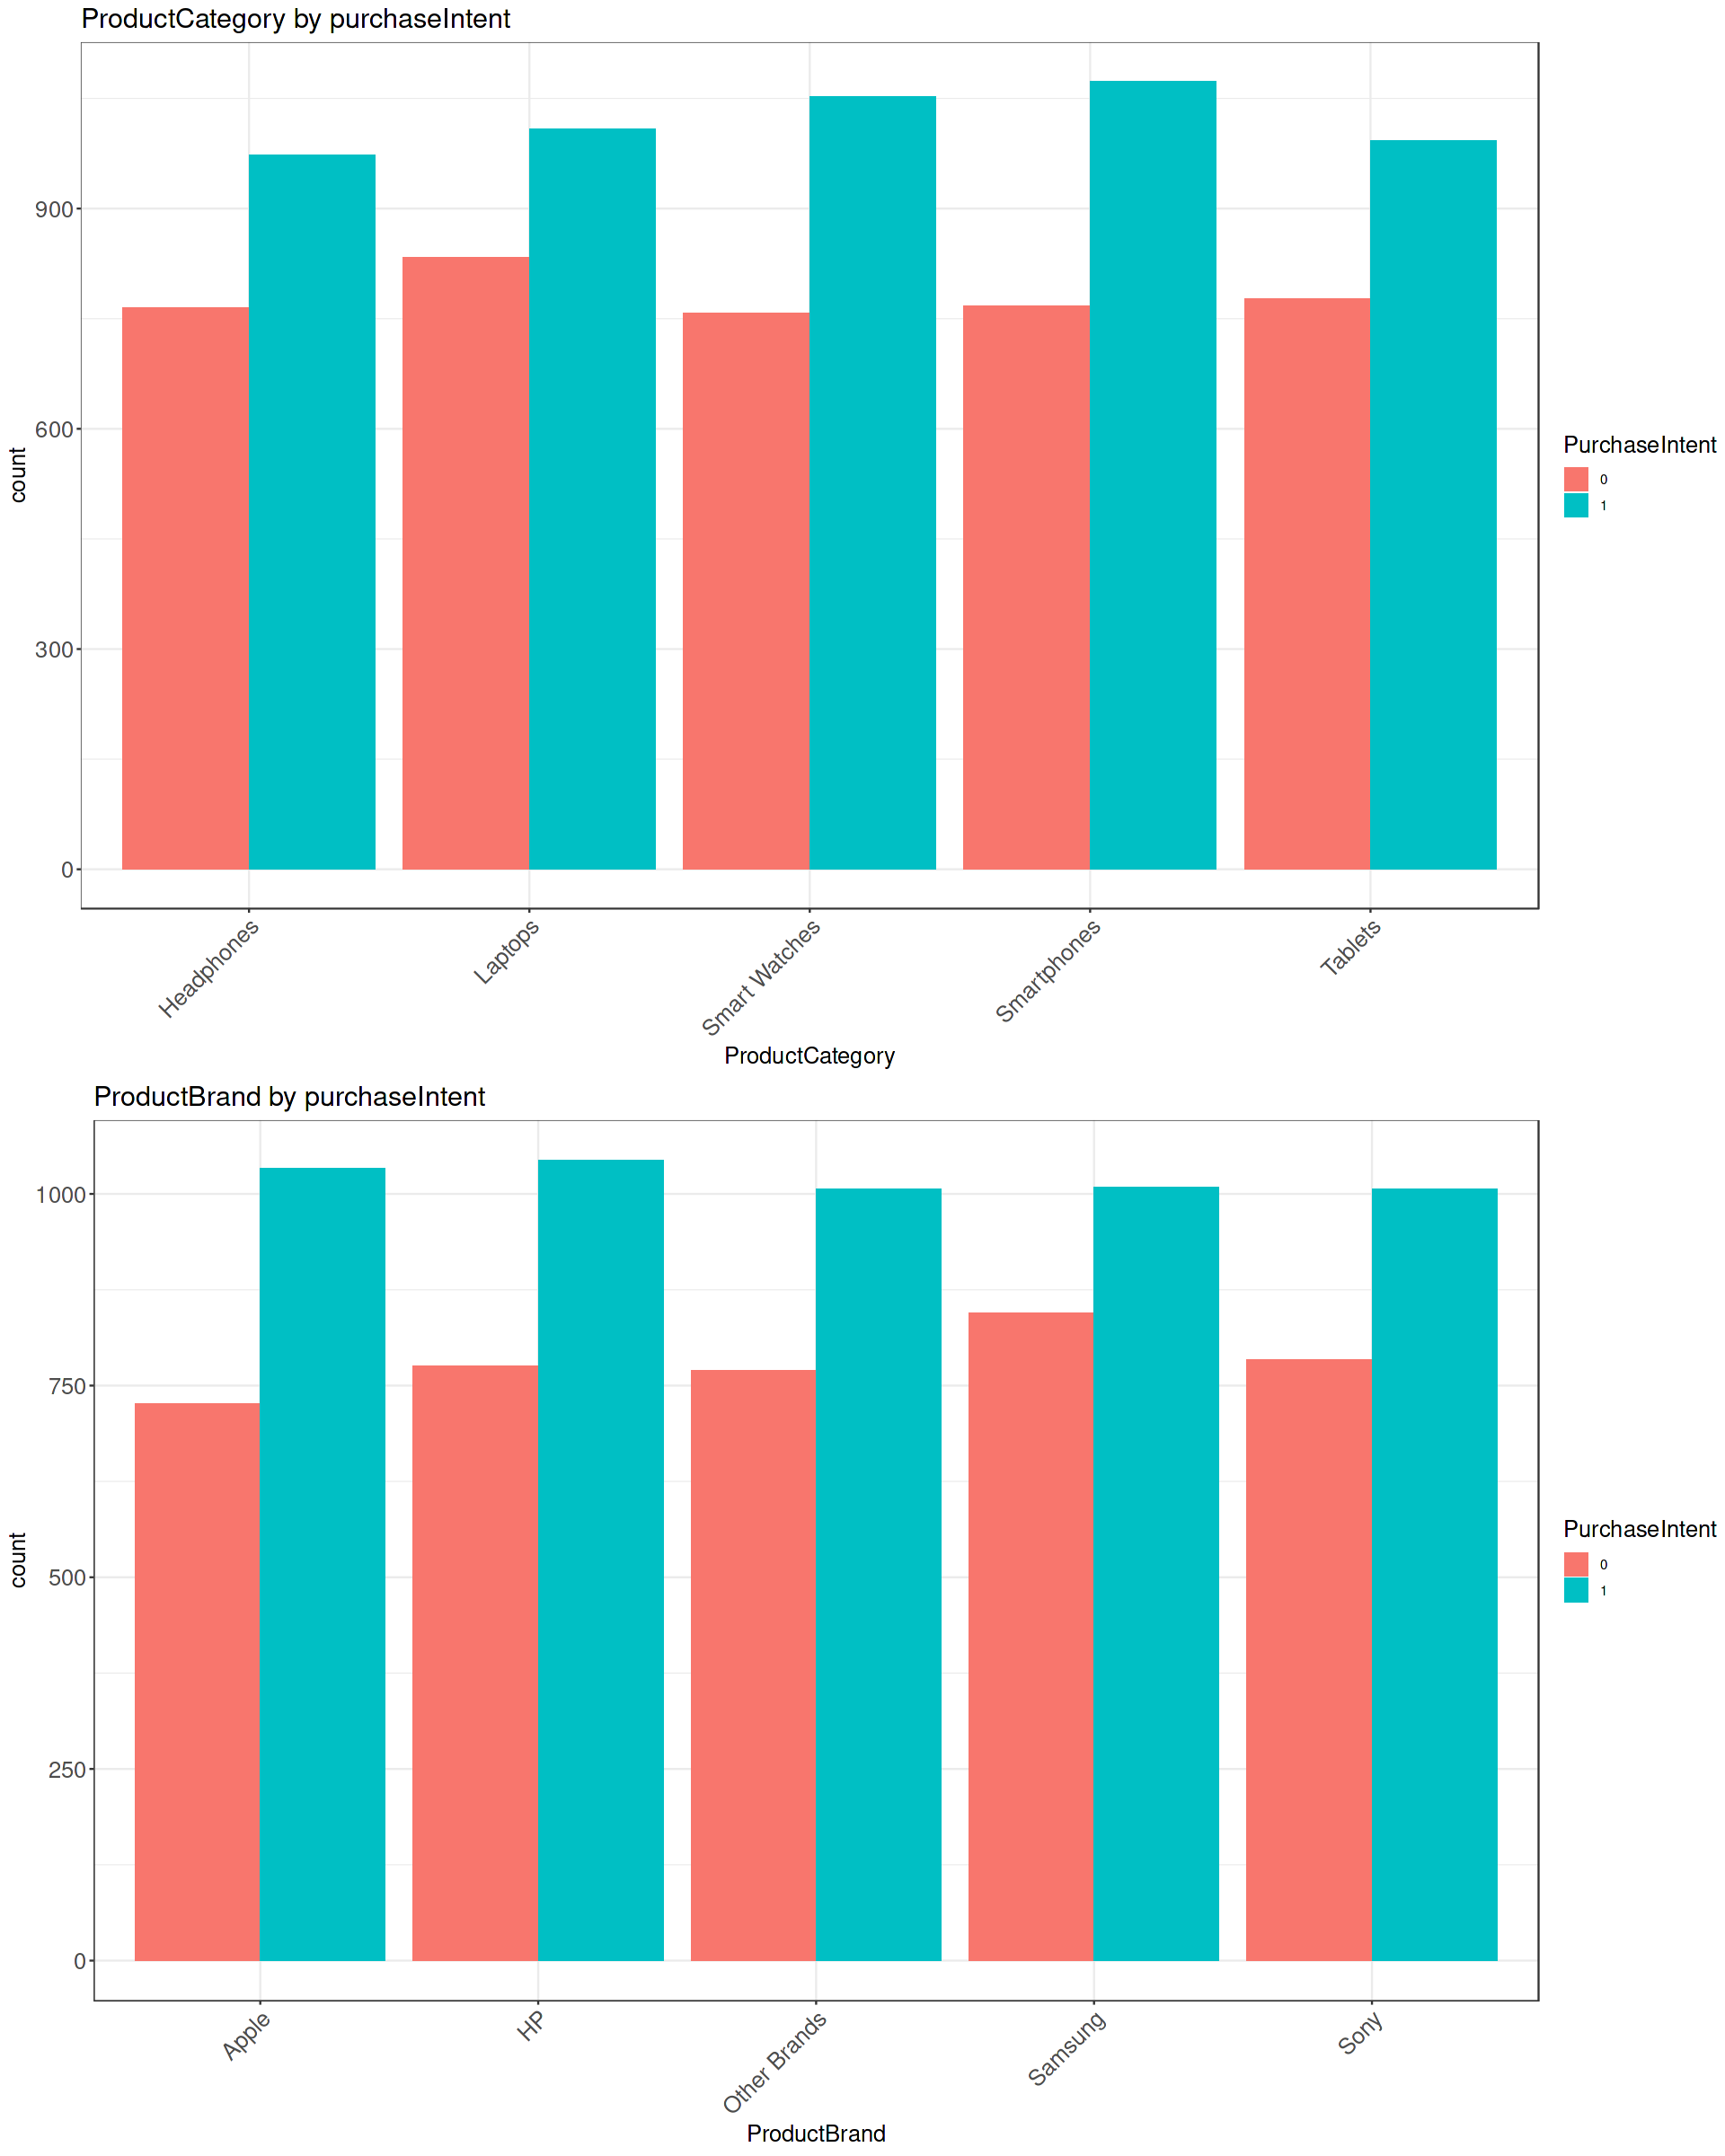

In [122]:
grid.arrange(a,b, ncol = 1)

**Categorical Variables by CustomerGender**

In [123]:
a <- ggplot(data) + geom_bar(aes(x= ProductCategory , fill = factor(CustomerGender)), position = 'dodge') +
    theme_bw() +
    ggtitle('ProductCategory by CustomerGender') + 
    labs(fill = 'CustomerGender') +
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1 , angle = 45),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

b <- ggplot(data) + geom_bar(aes(x= ProductBrand , fill = factor(CustomerGender)), position = 'dodge') +
    theme_bw() +
    ggtitle('ProductBrand by CustomerGender') + 
    labs(fill = 'CustomerGender') +
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1 , angle = 45),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

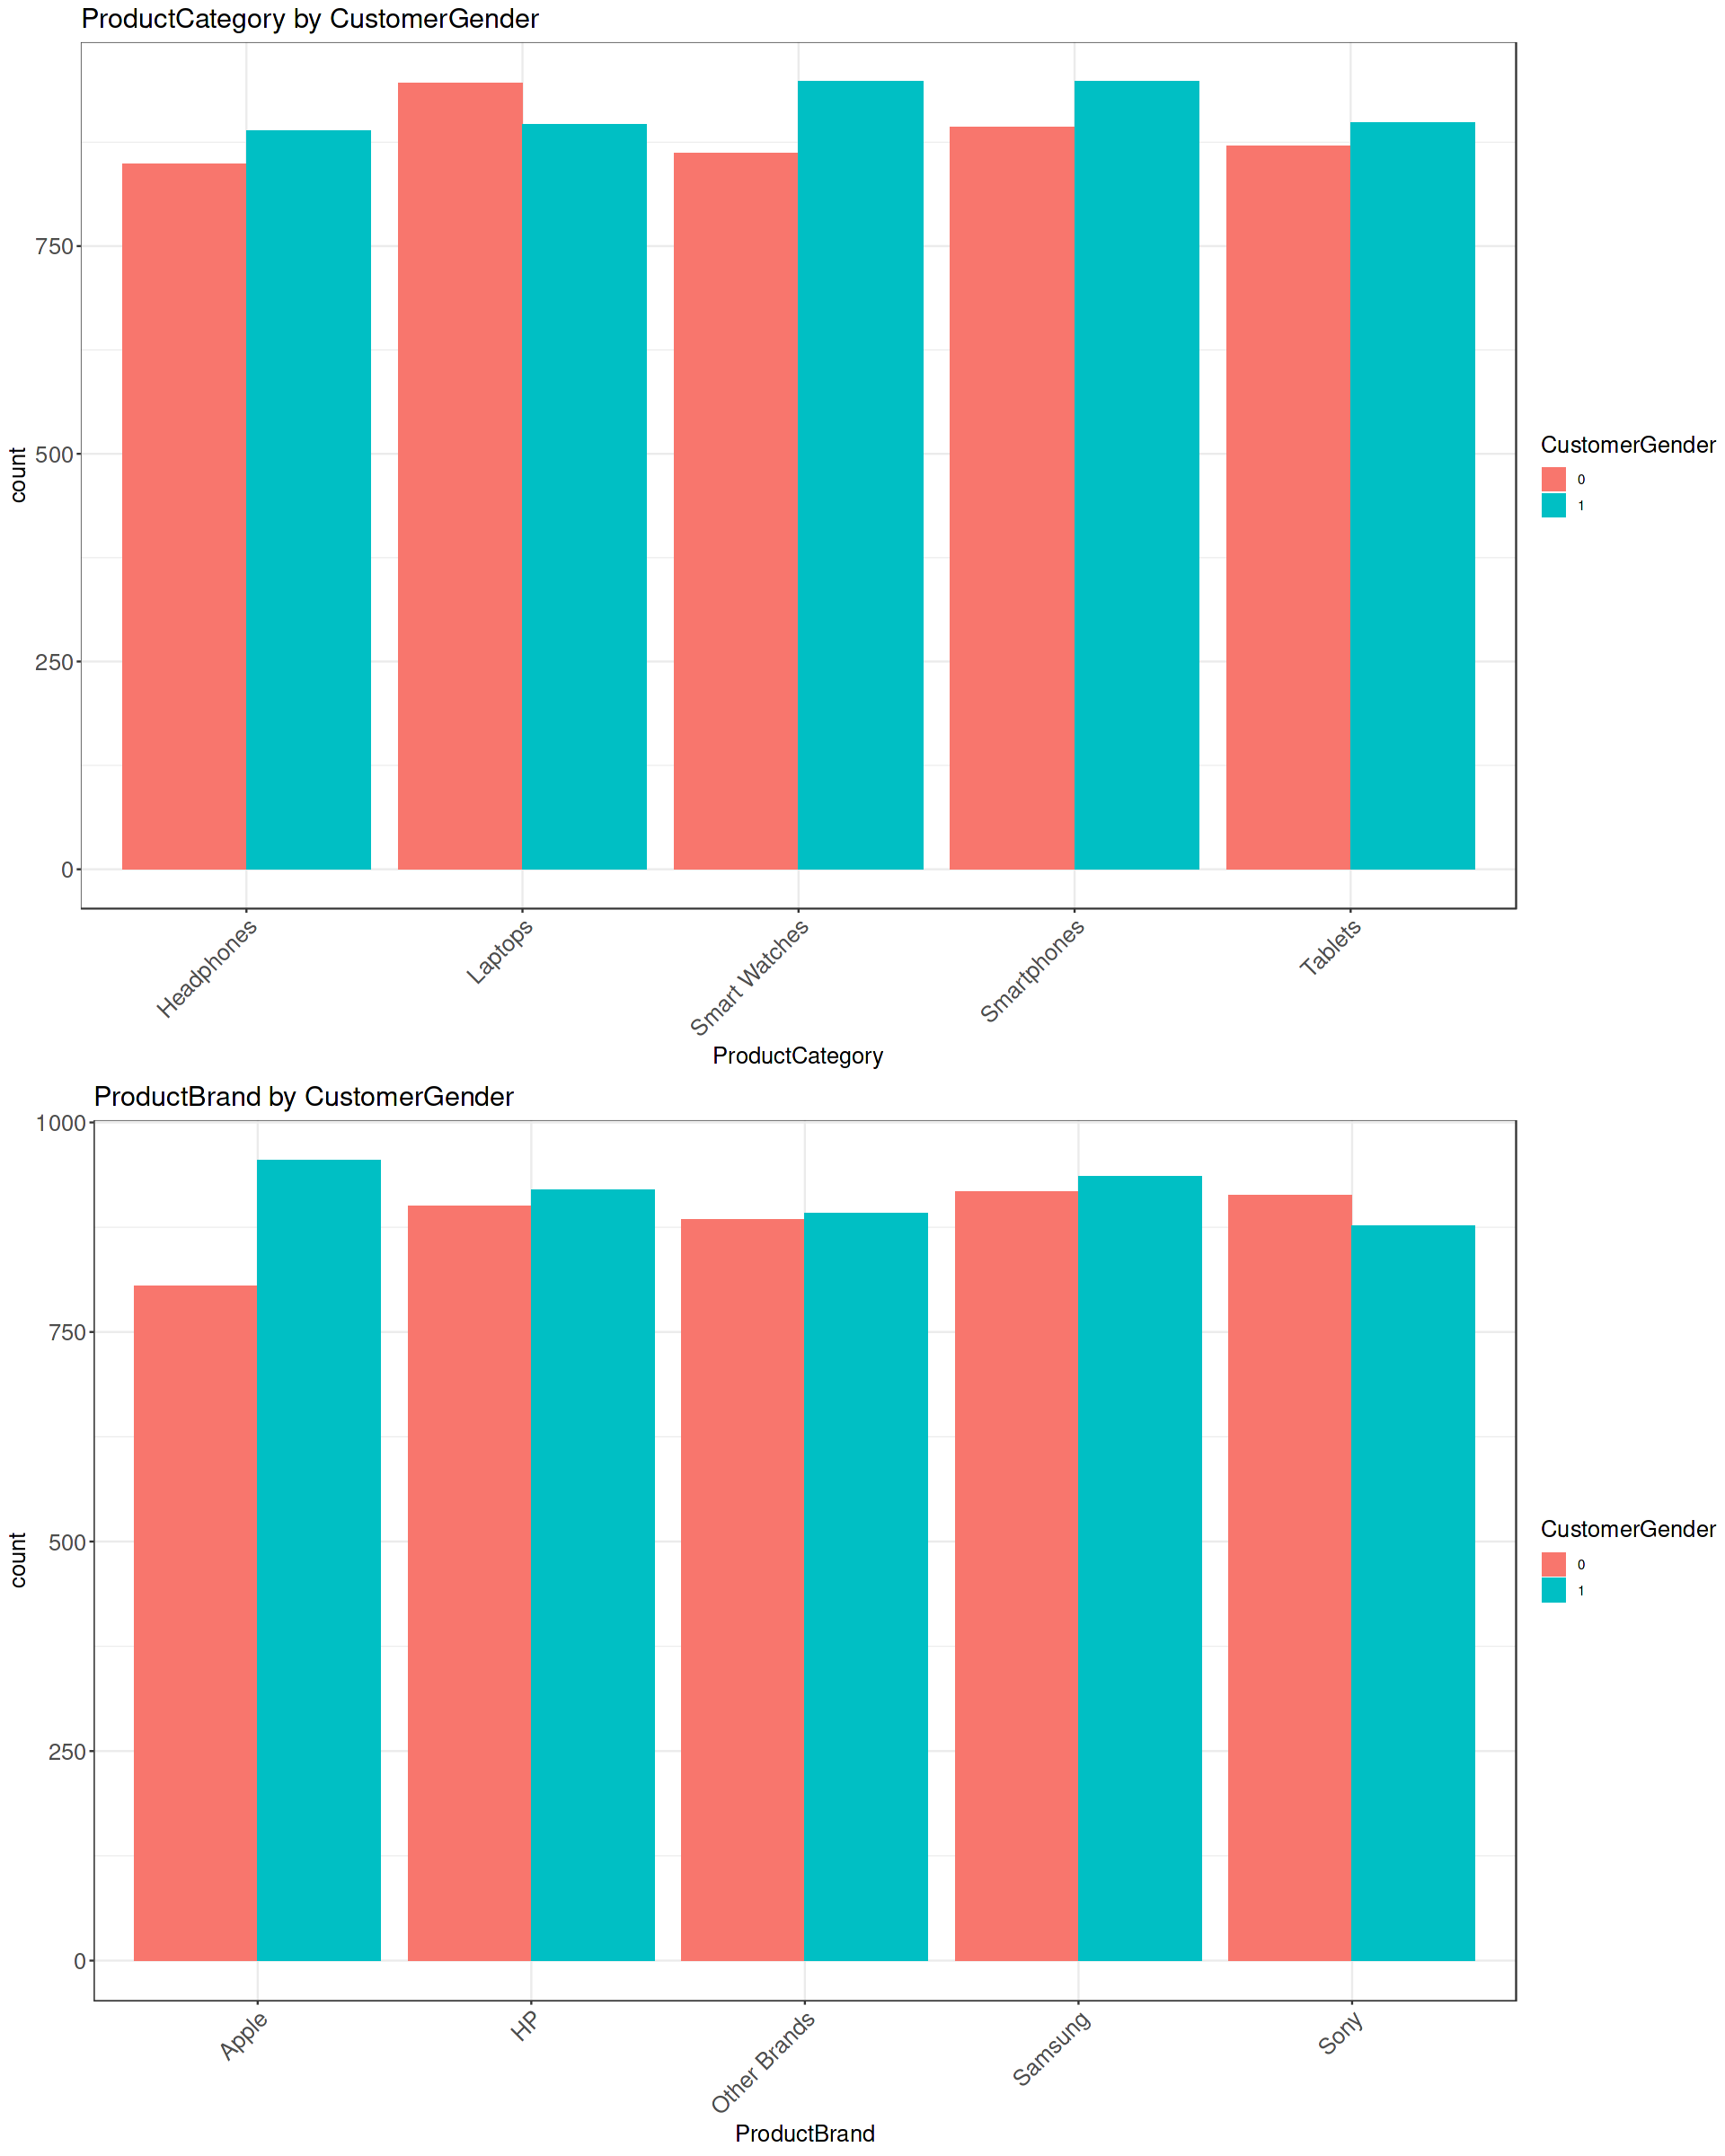

In [124]:
grid.arrange(a,b, ncol = 1)

**Average ProductPrice by ProductBrand**

In [125]:
brand_avg_price <- data %>% 
                    group_by(ProductBrand) %>%
                    summarize(Average_price = mean(ProductPrice, na.rm=T))

In [126]:
brand_avg_price

ProductBrand,Average_price
<chr>,<dbl>
Apple,1502.500
HP,1539.973
Other Brands,1499.357
Samsung,1568.325
Sony,1524.681


In [127]:
options(repr.plot.width = 20.0, repr.plot.height = 15.0)

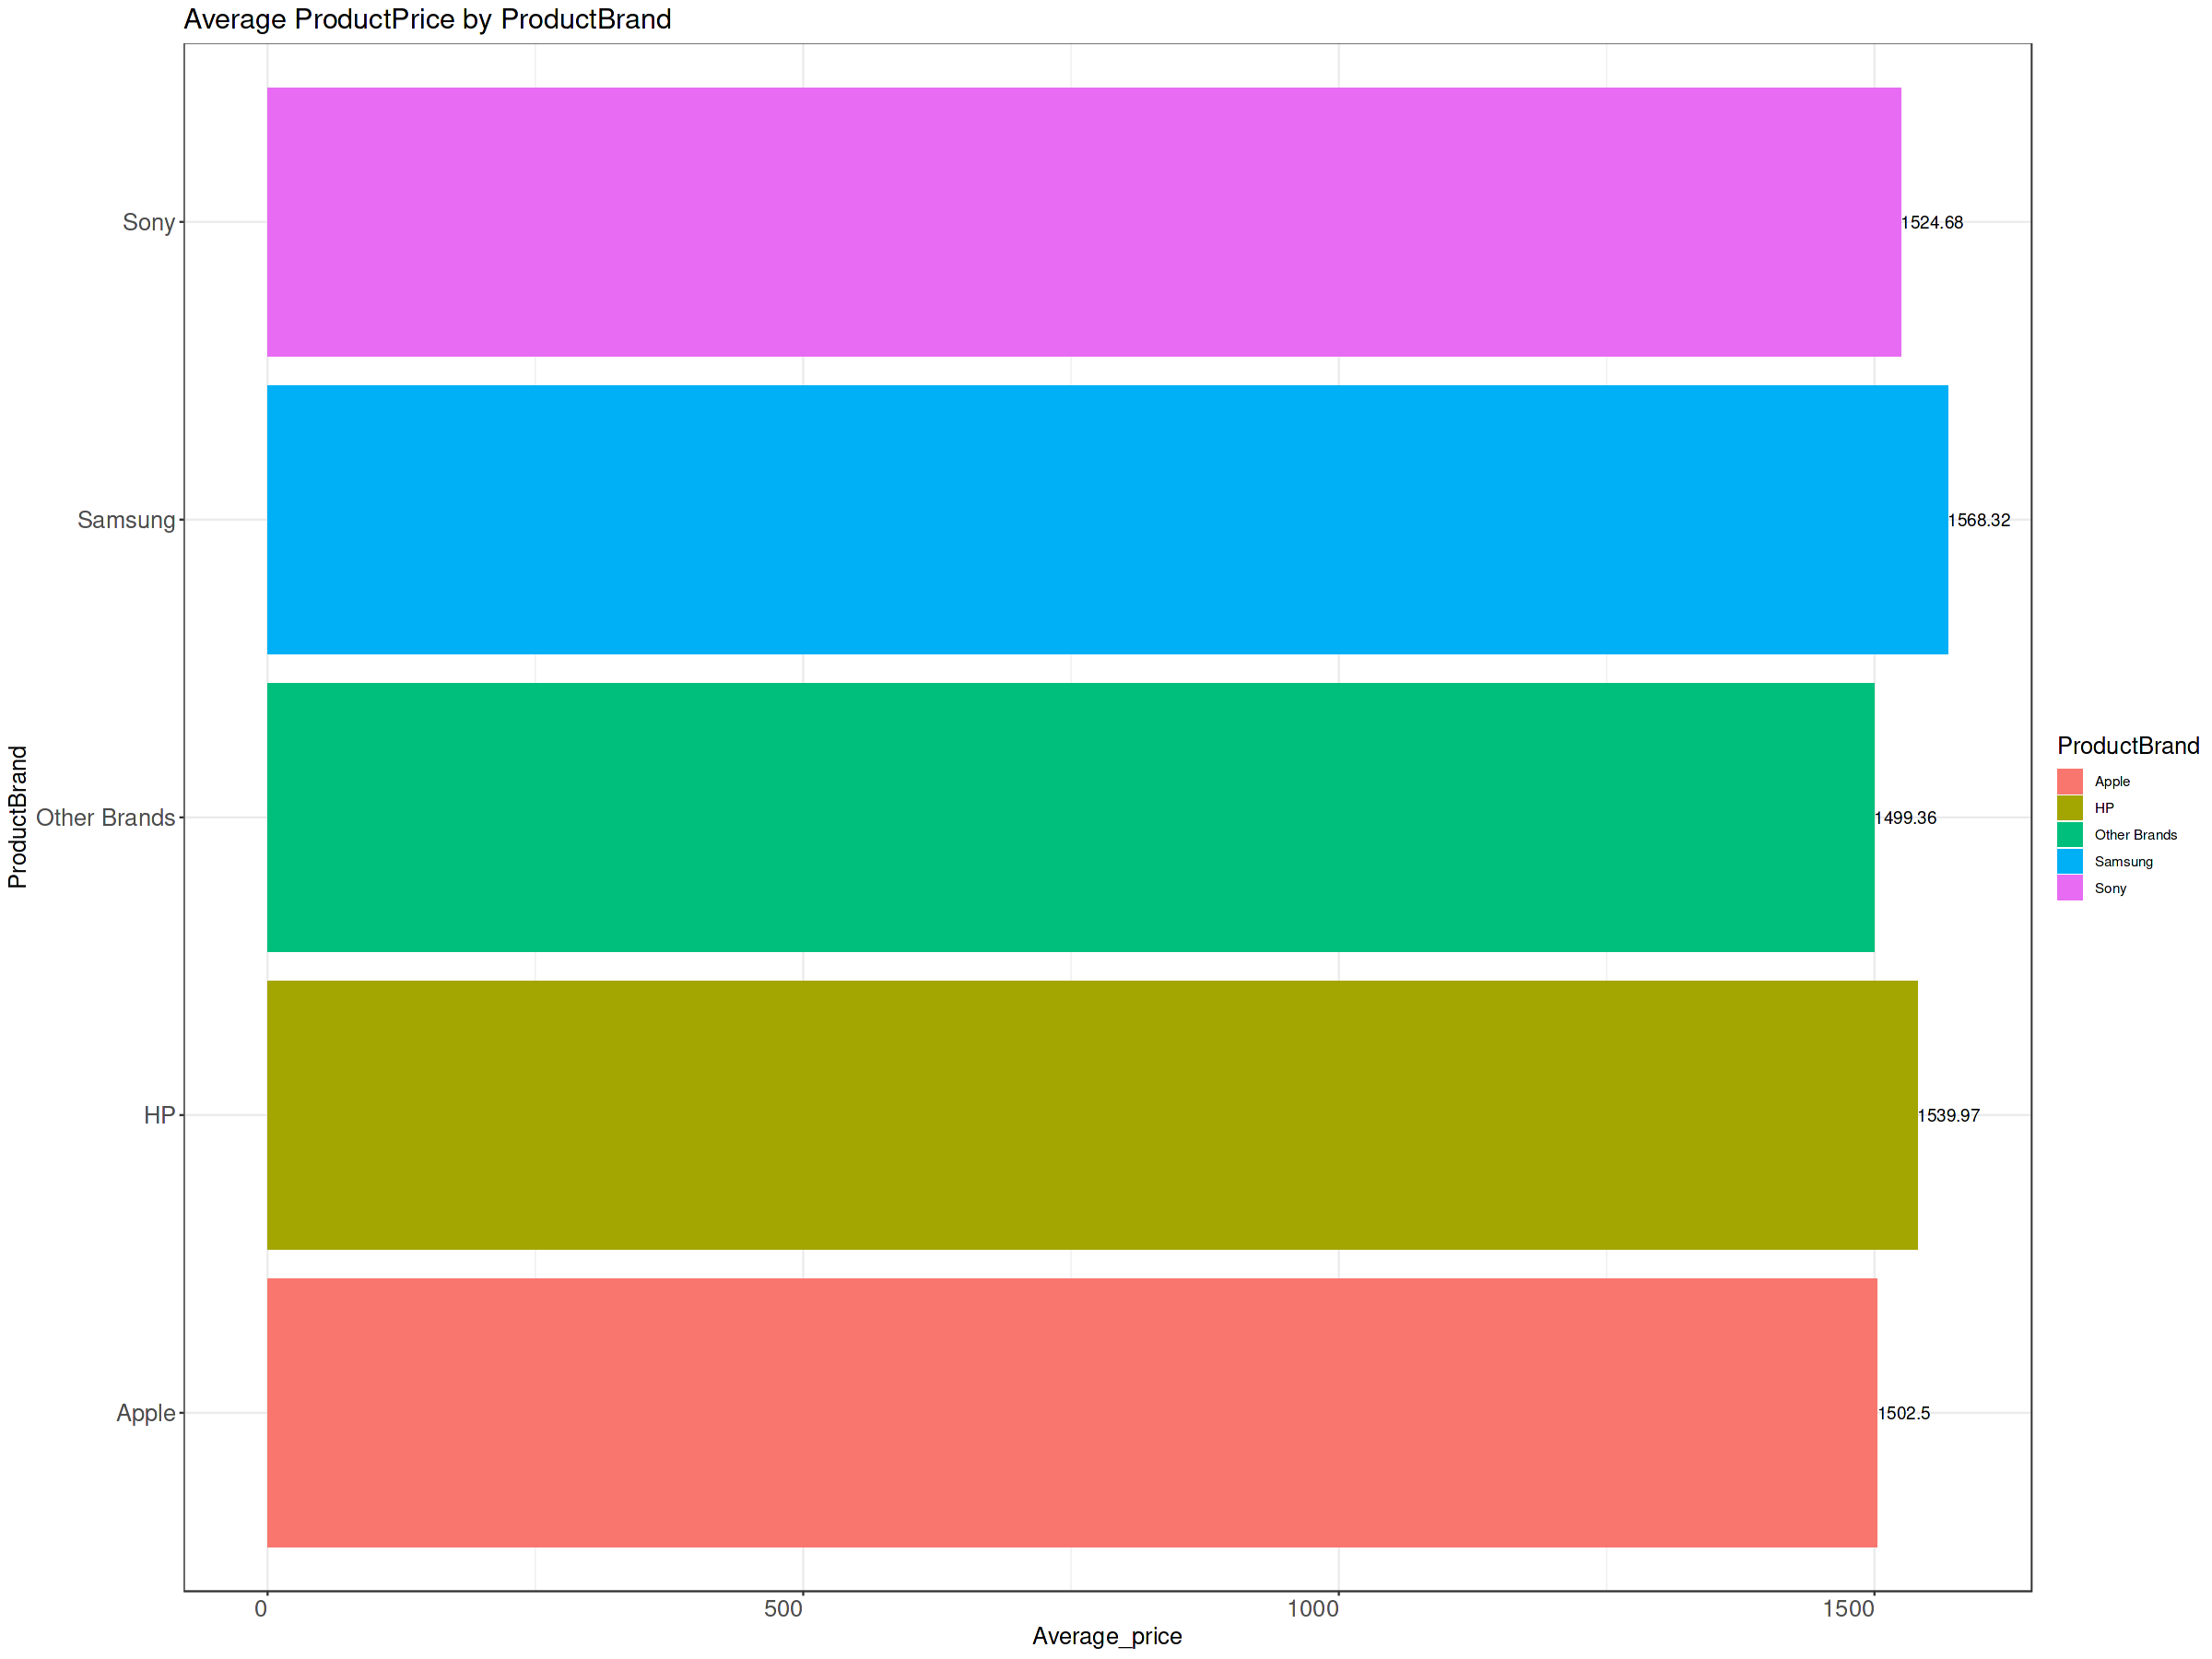

In [128]:
ggplot(brand_avg_price) + 
    geom_col(aes(x= Average_price , y = ProductBrand , fill = ProductBrand)) +
    geom_text(aes(x = Average_price , y= ProductBrand, label= round(Average_price,2)), hjust=0) +
    theme_bw() +
    ggtitle('Average ProductPrice by ProductBrand') + 
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

**Average ProductPrice by ProductCategroy**

In [129]:
cat_avg_price <- data %>% 
                    group_by(ProductCategory) %>%
                    summarize(Average_price = mean(ProductPrice, na.rm=T))

In [130]:
cat_avg_price

ProductCategory,Average_price
<chr>,<dbl>
Headphones,1567.213
Laptops,1522.446
Smart Watches,1538.932
Smartphones,1479.301
Tablets,1531.848


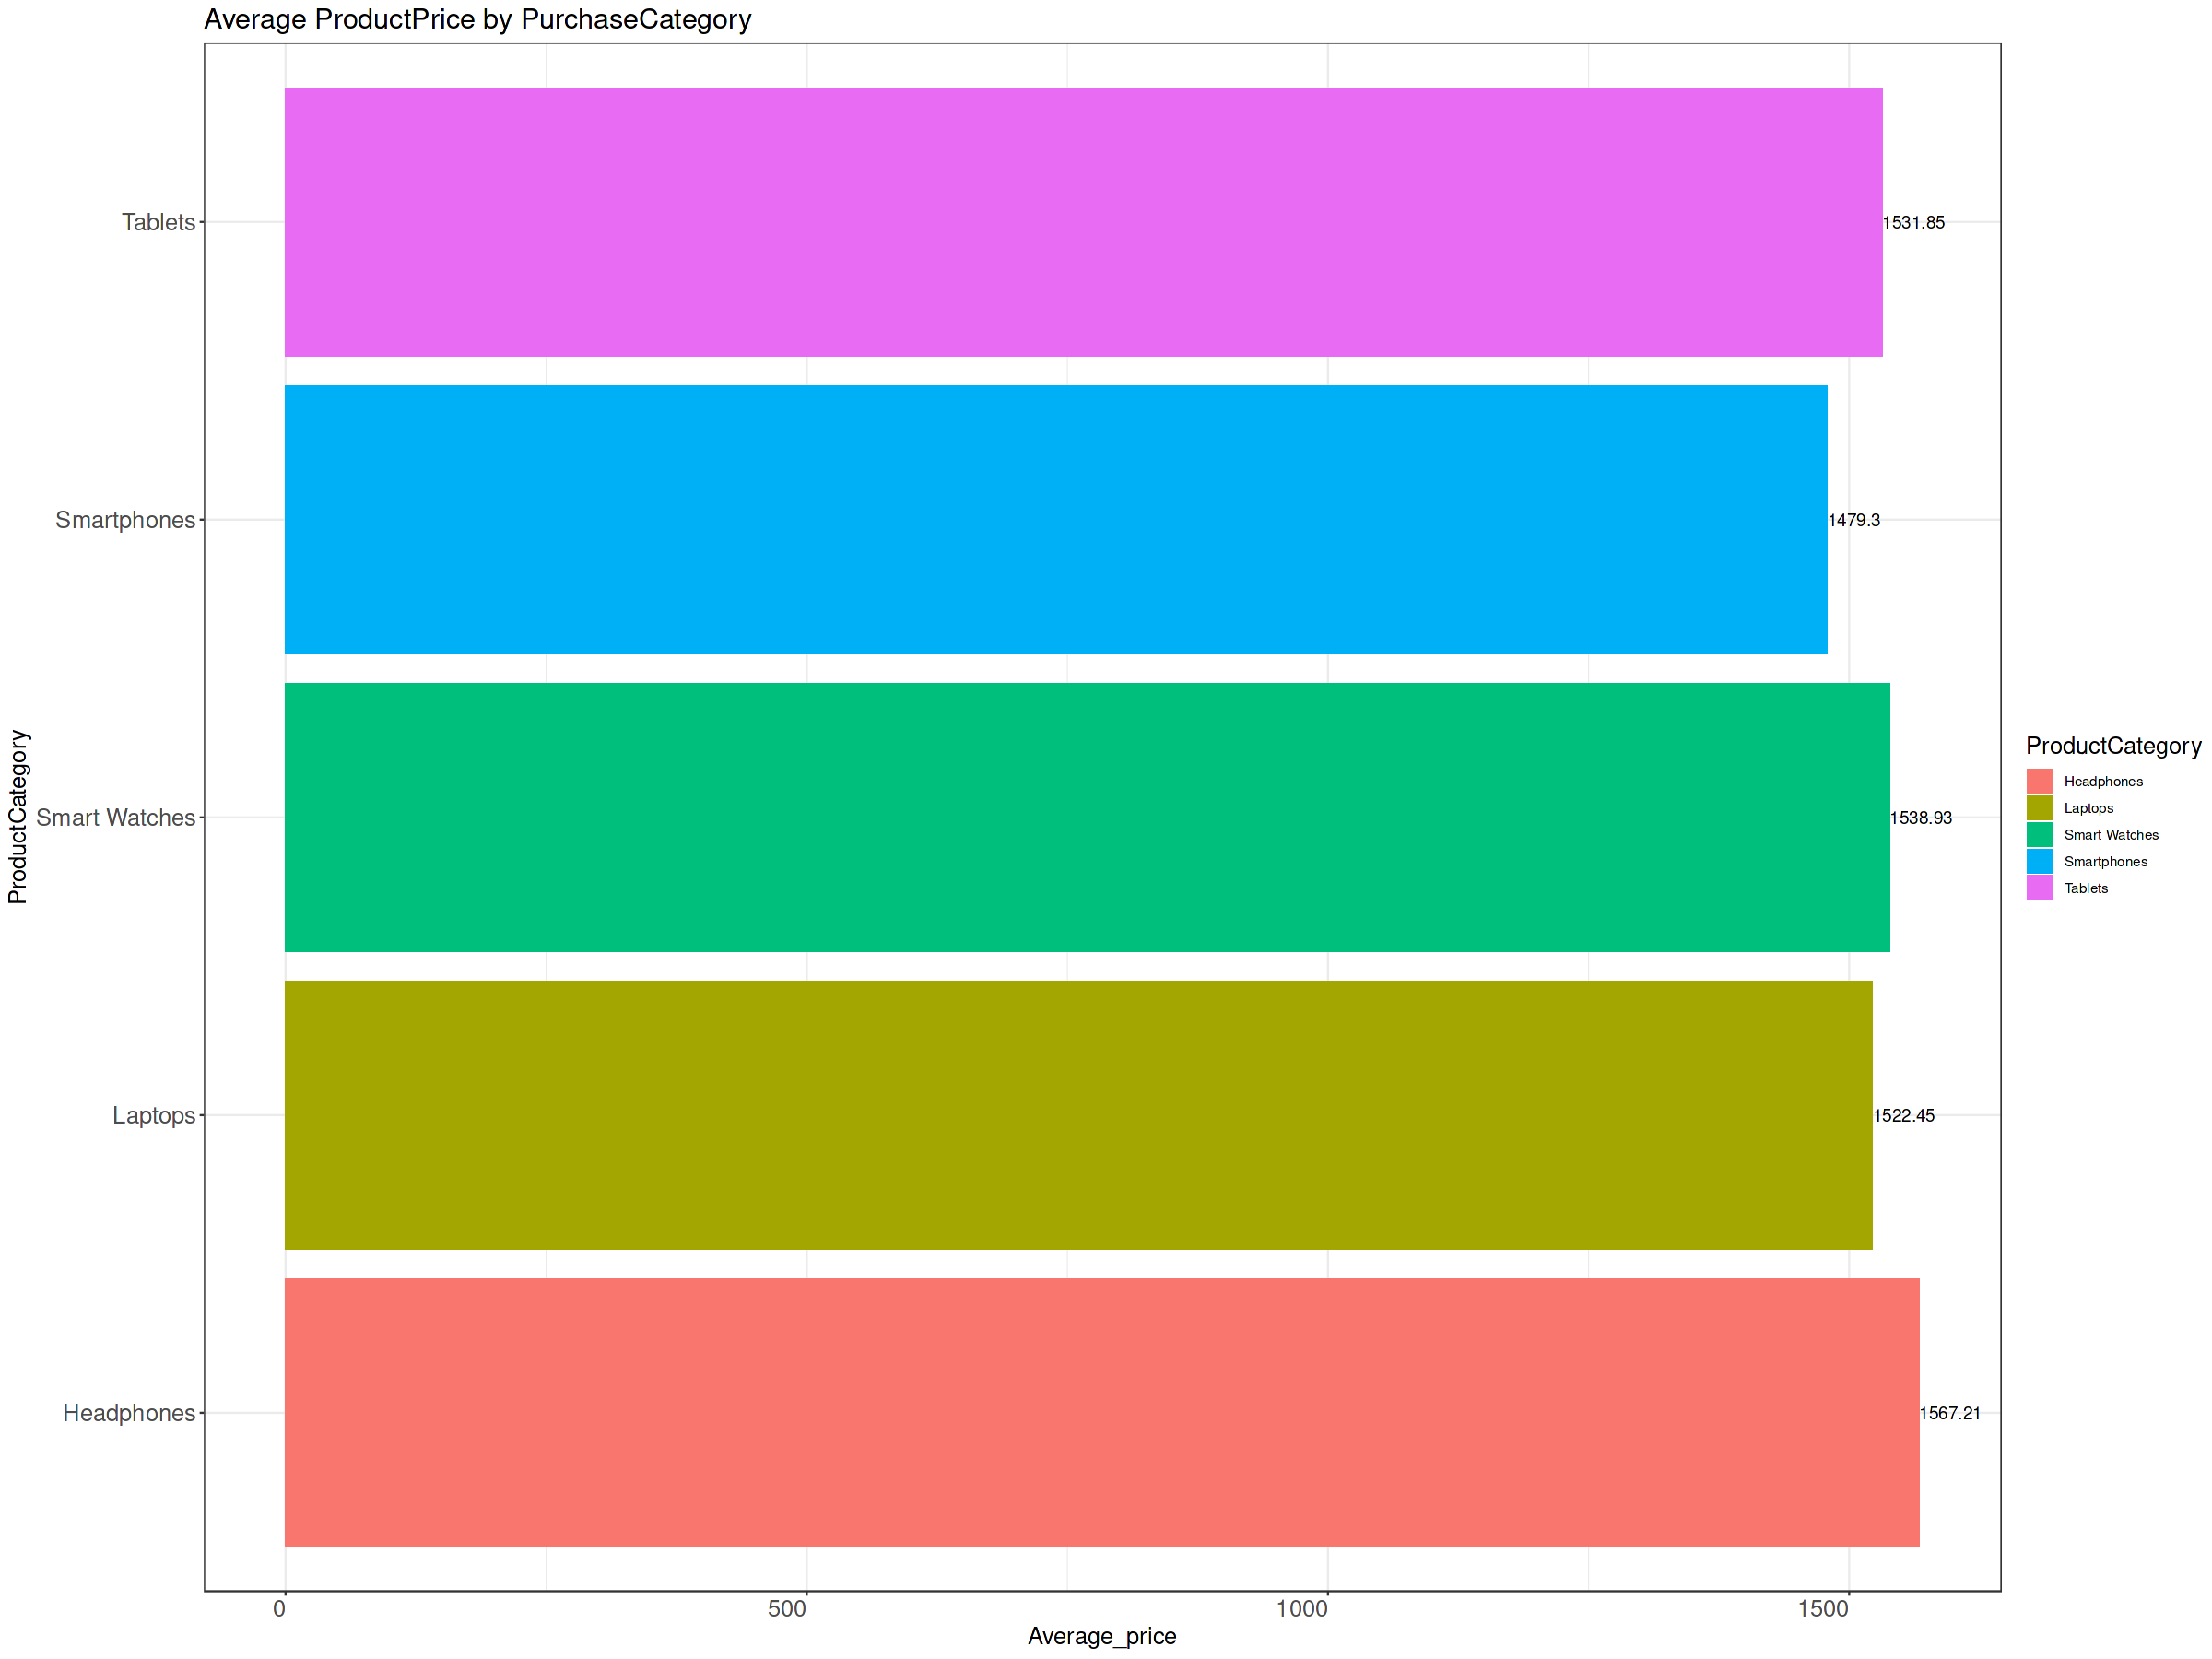

In [131]:
ggplot(cat_avg_price) + 
    geom_col(aes(x= Average_price , y = ProductCategory , fill = ProductCategory)) +
    geom_text(aes(x = Average_price , y= ProductCategory, label= round(Average_price,2)), hjust=0) +
    theme_bw() +
    ggtitle('Average ProductPrice by PurchaseCategory') + 
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

**Average ProductPrice by PurchaseIntent**

In [132]:
pi_avg_price <- data %>% 
                    group_by(PurchaseIntent) %>%
                    summarize(Average_price = mean(ProductPrice, na.rm=T))

pi_avg_price$PurchaseIntent <- as.factor(pi_avg_price$PurchaseIntent)

In [133]:
pi_avg_price

PurchaseIntent,Average_price
<fct>,<dbl>
0,1544.040
1,1514.715


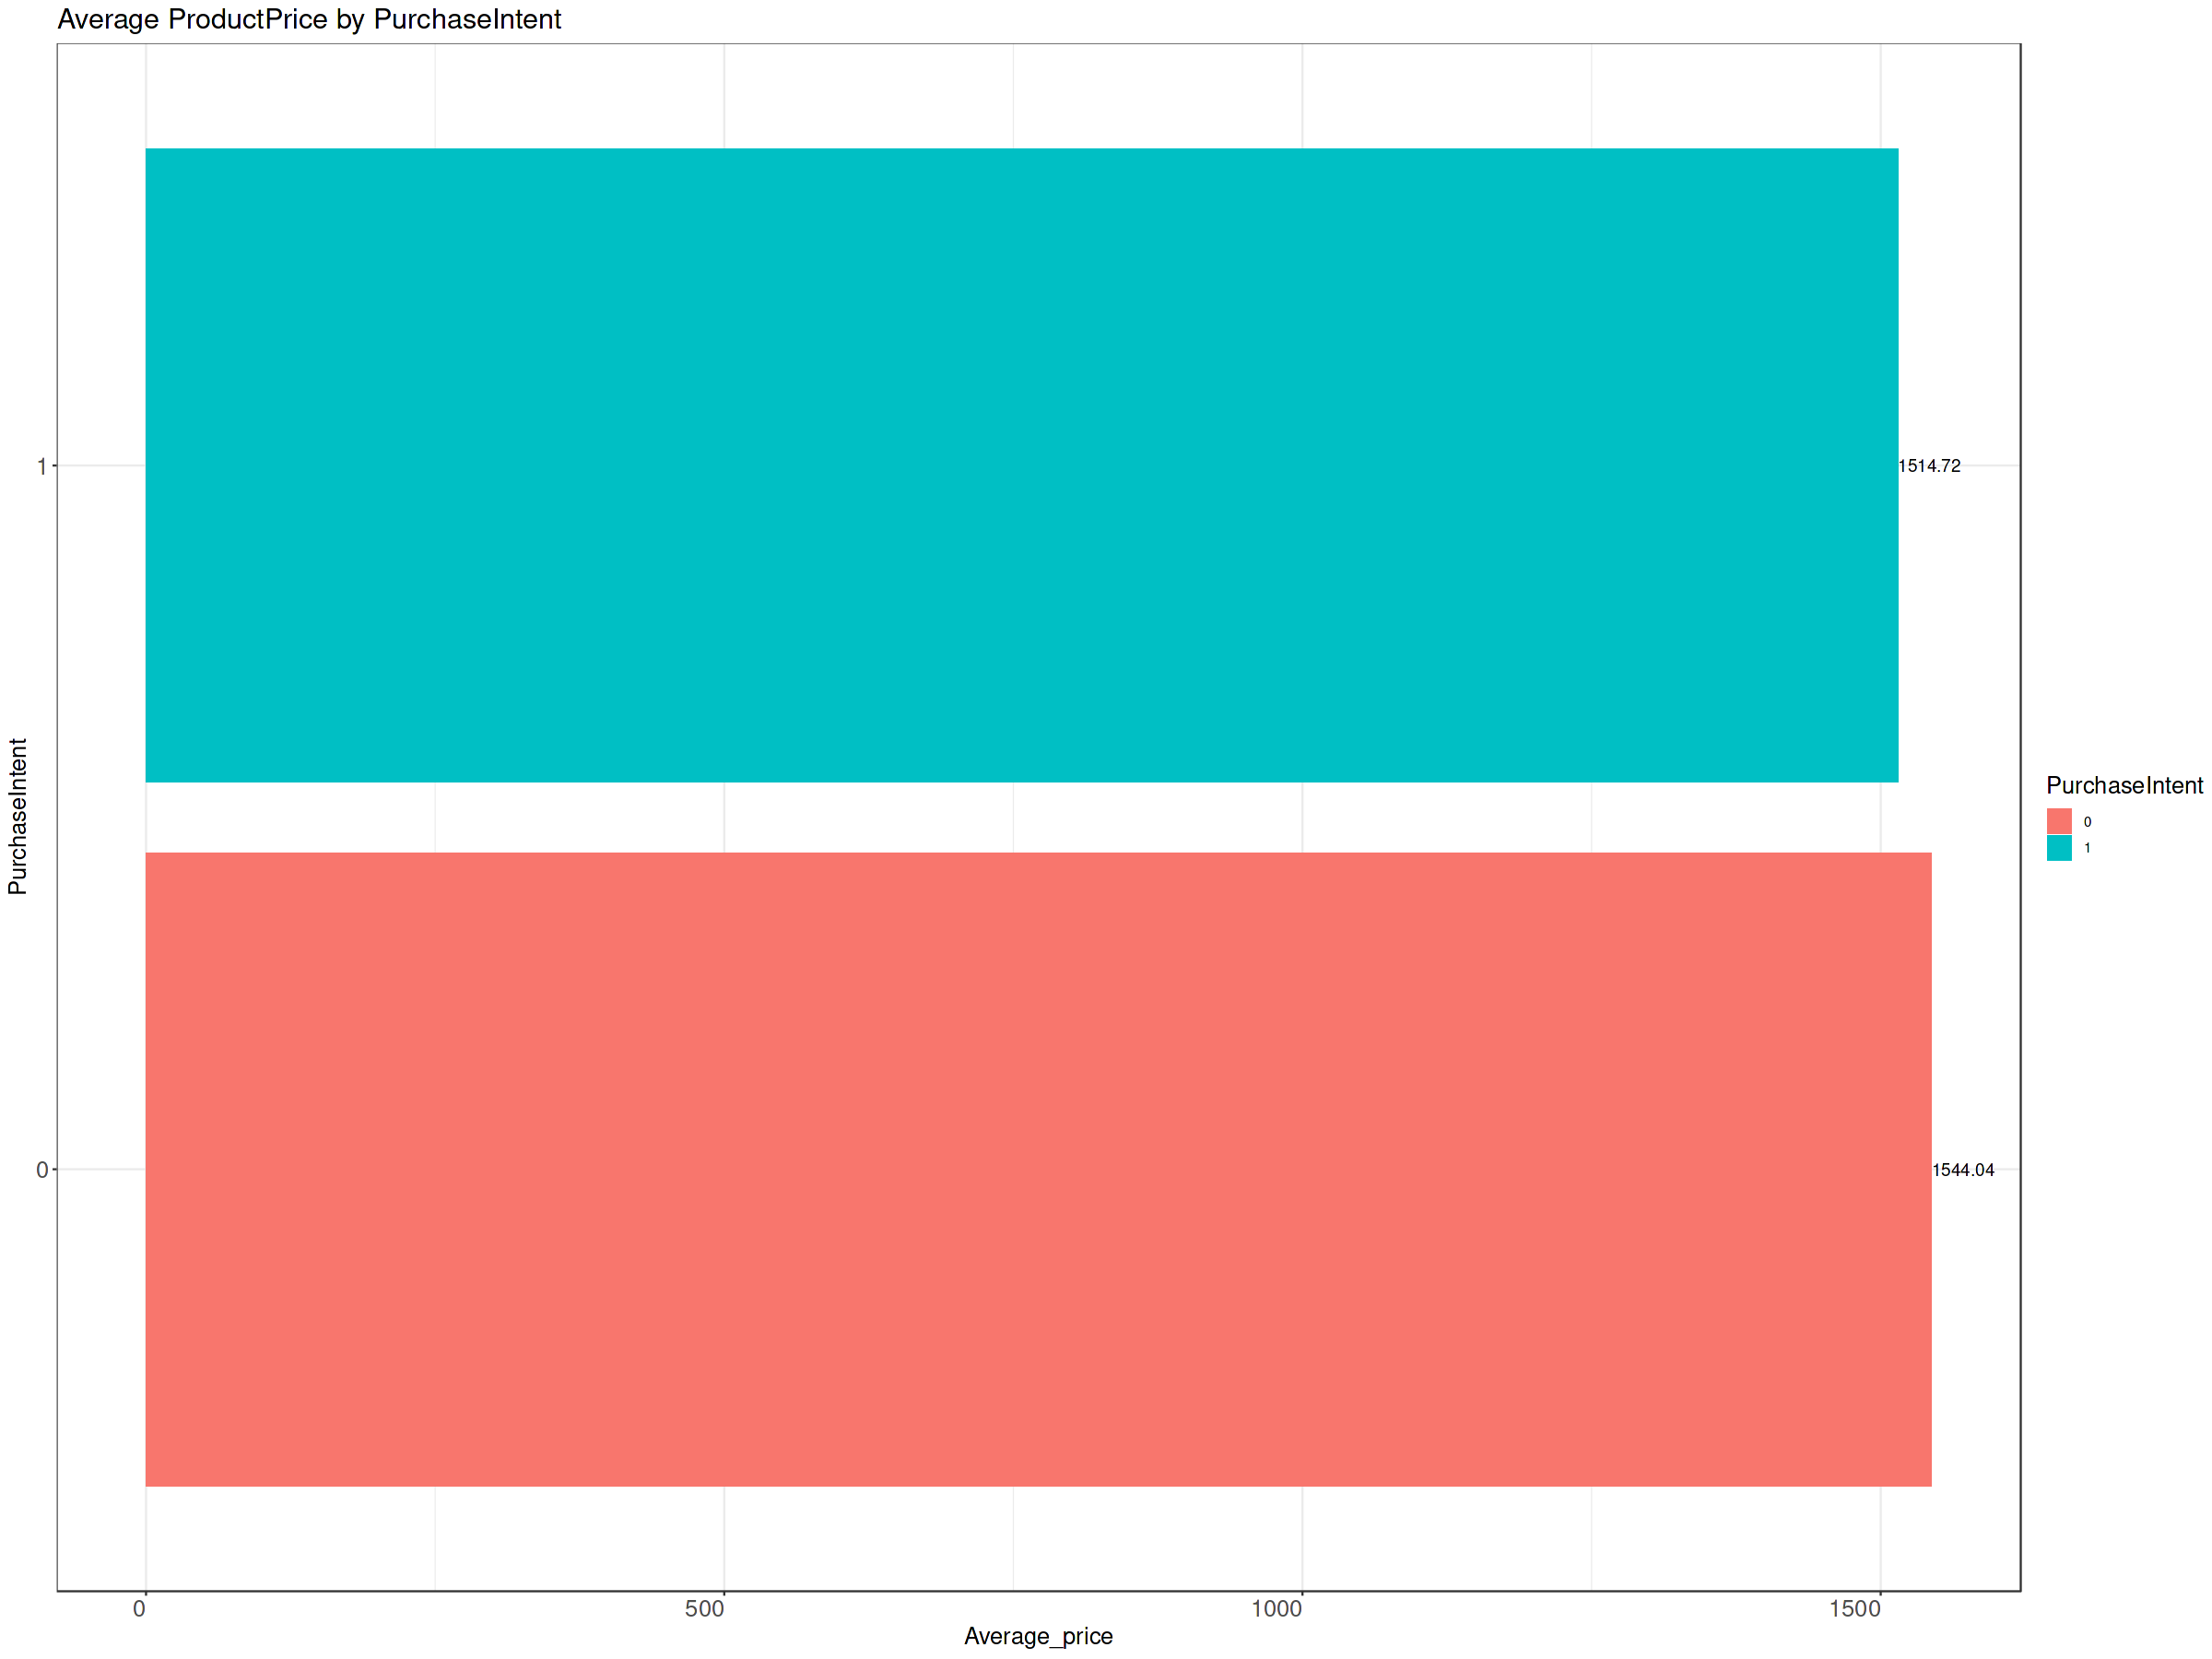

In [134]:
ggplot(pi_avg_price) + 
    geom_col(aes(x= Average_price , y = PurchaseIntent , fill = PurchaseIntent)) +
    geom_text(aes(x = Average_price , y= PurchaseIntent, label= round(Average_price,2)), hjust=0) +
    theme_bw() +
    ggtitle('Average ProductPrice by PurchaseIntent') + 
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

**CustomerSatisfaction Rate**

In [135]:
CustomerSatisfaction_rate <- data %>% 
                group_by(CustomerSatisfaction) %>%
                count(CustomerSatisfaction)

CustomerSatisfaction_rate$CustomerSatisfaction <- as.factor(CustomerSatisfaction_rate$CustomerSatisfaction)

In [136]:
CustomerSatisfaction_rate

CustomerSatisfaction,n
<fct>,<int>
1,1775
2,1814
3,1848
4,1798
5,1765


In [137]:
pct <- paste(round(CustomerSatisfaction_rate$n / sum(CustomerSatisfaction_rate$n) * 100 ,1),'%')

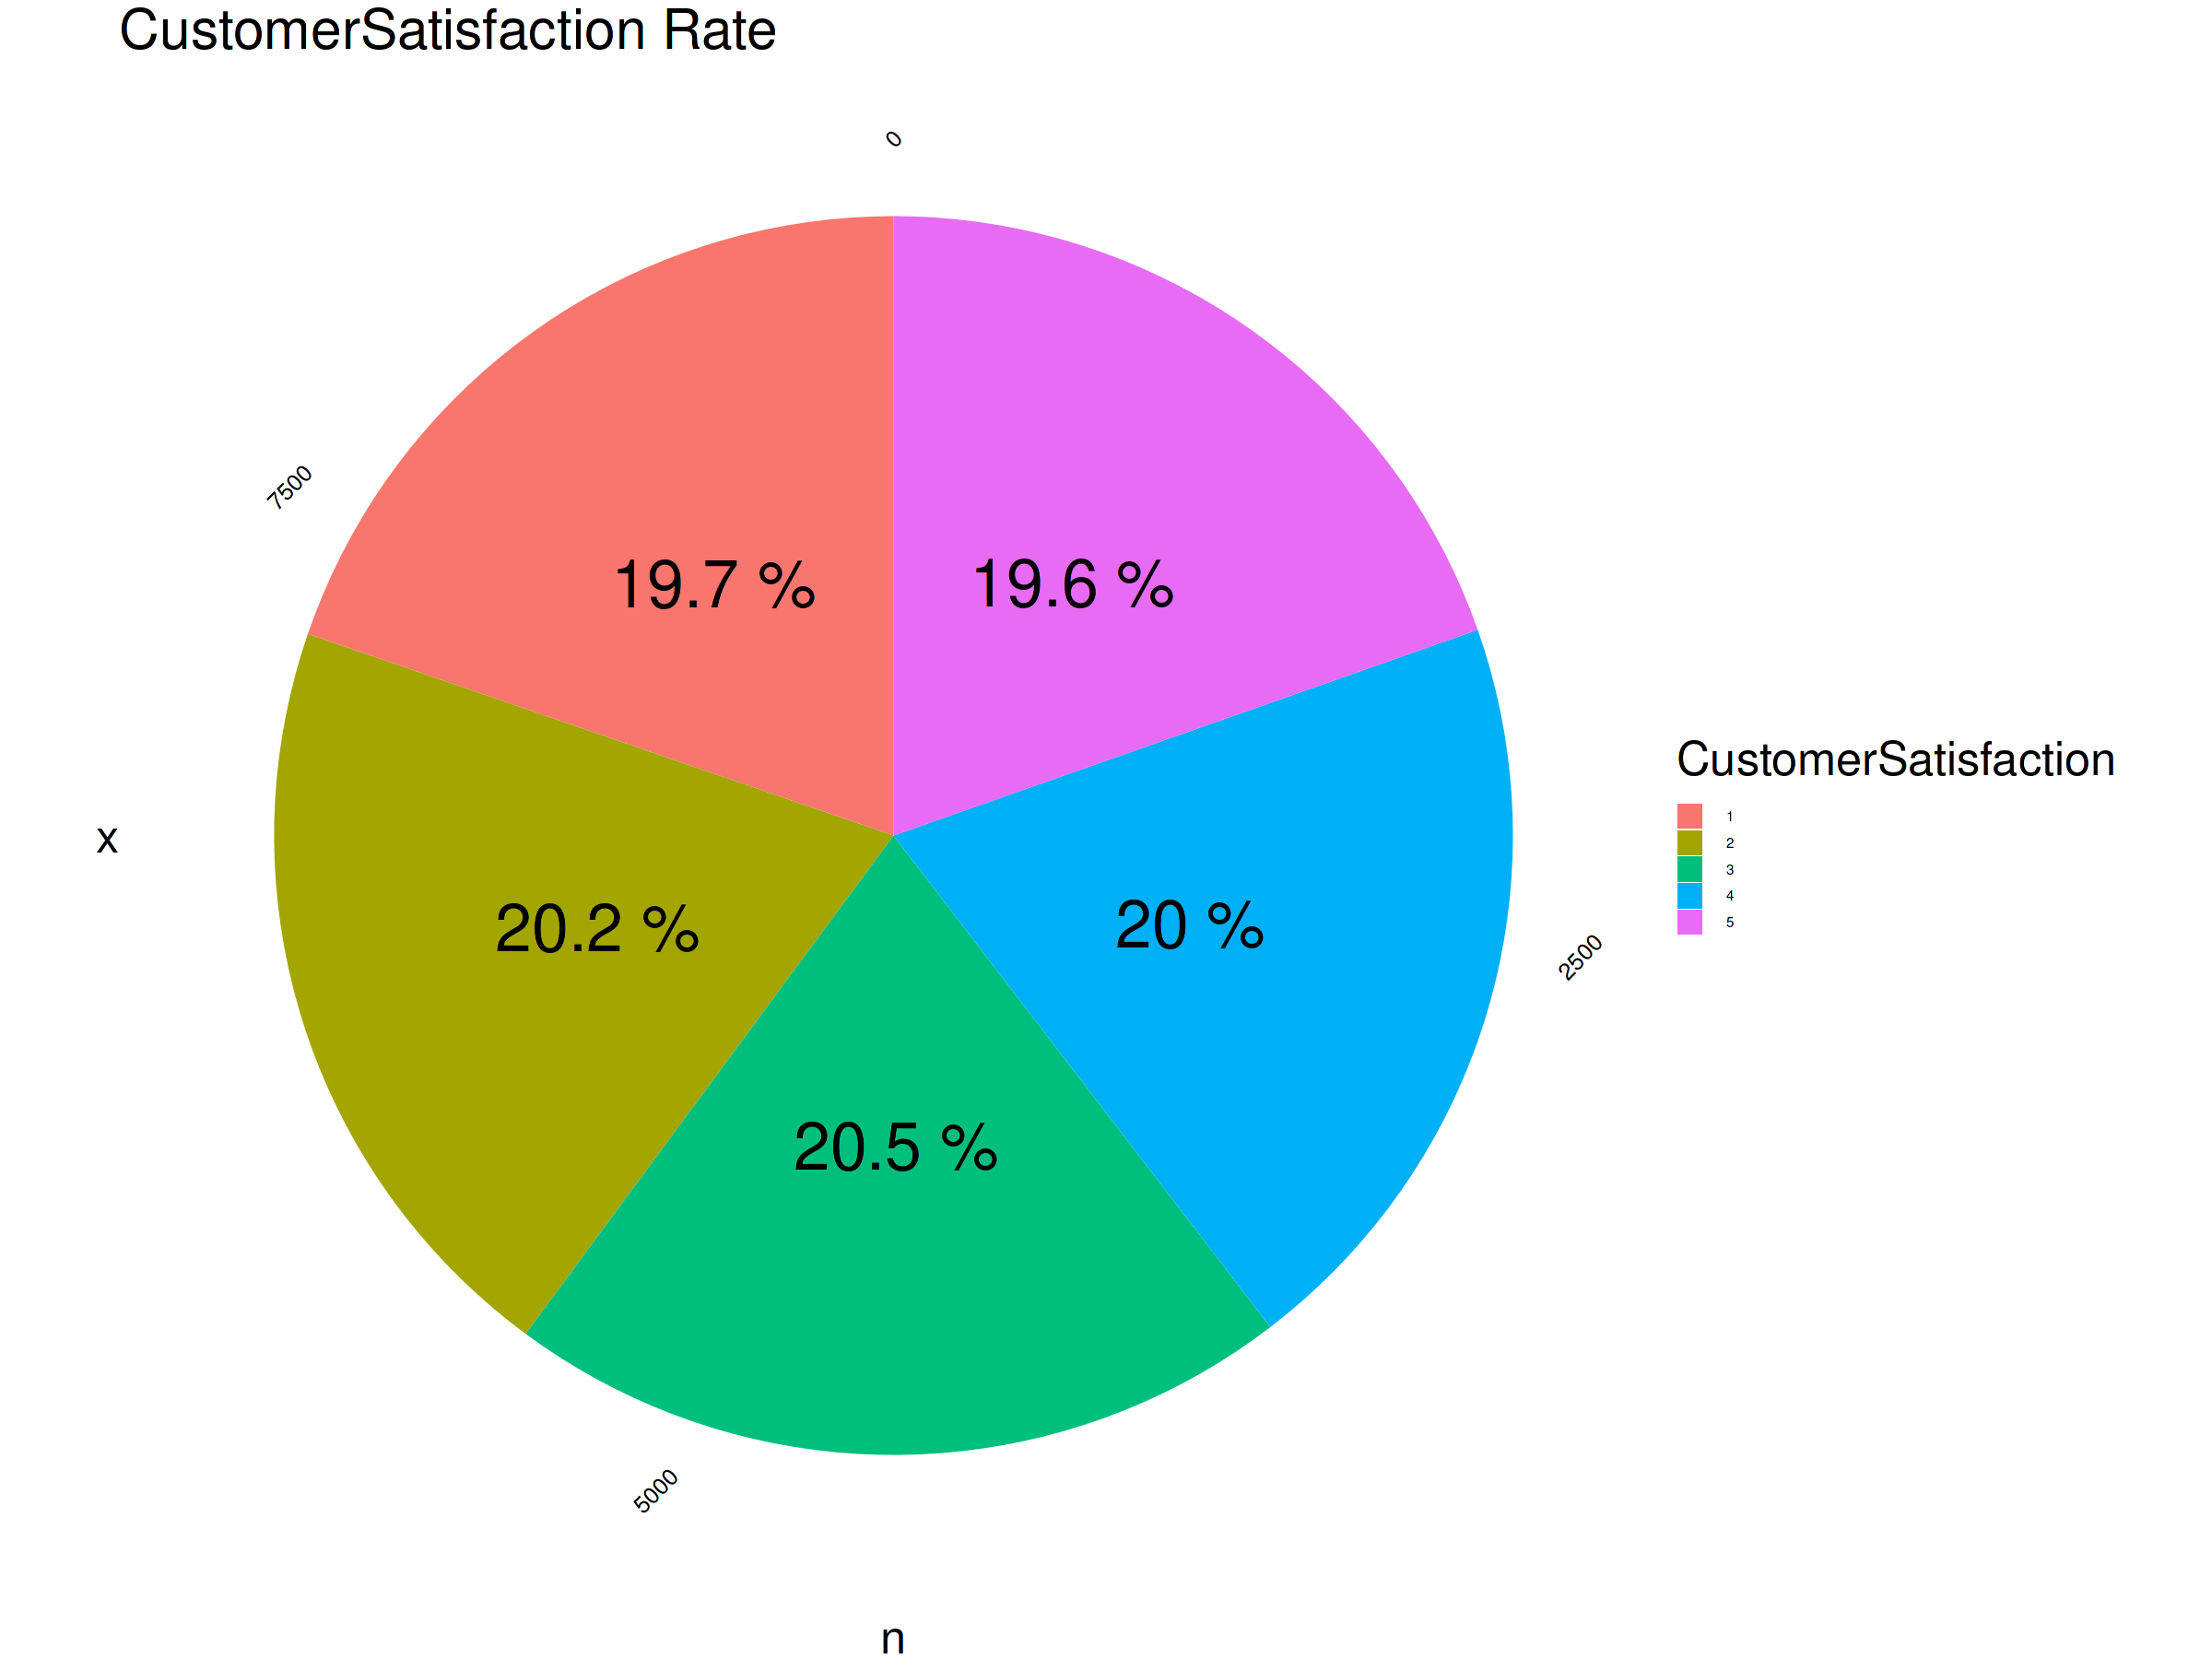

In [138]:
ggplot(CustomerSatisfaction_rate, aes(x= 1 , y= n , fill = CustomerSatisfaction)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct), position = position_stack(vjust = 0.5), size = 15) +
        coord_polar('y', start = 0) +
        ggtitle('CustomerSatisfaction Rate') +
        theme_void() +
        theme(
        axis.title = element_text(size=30),
        axis.text.x = element_text(size = 15, angle = 45, hjust=1),
        title = element_text(size=30)
        )

**Correlation**

In [139]:
num_cols <- c('CustomerAge','CustomerGender','ProductPrice','PurchaseFrequency', 'CustomerSatisfaction','PurchaseIntent')

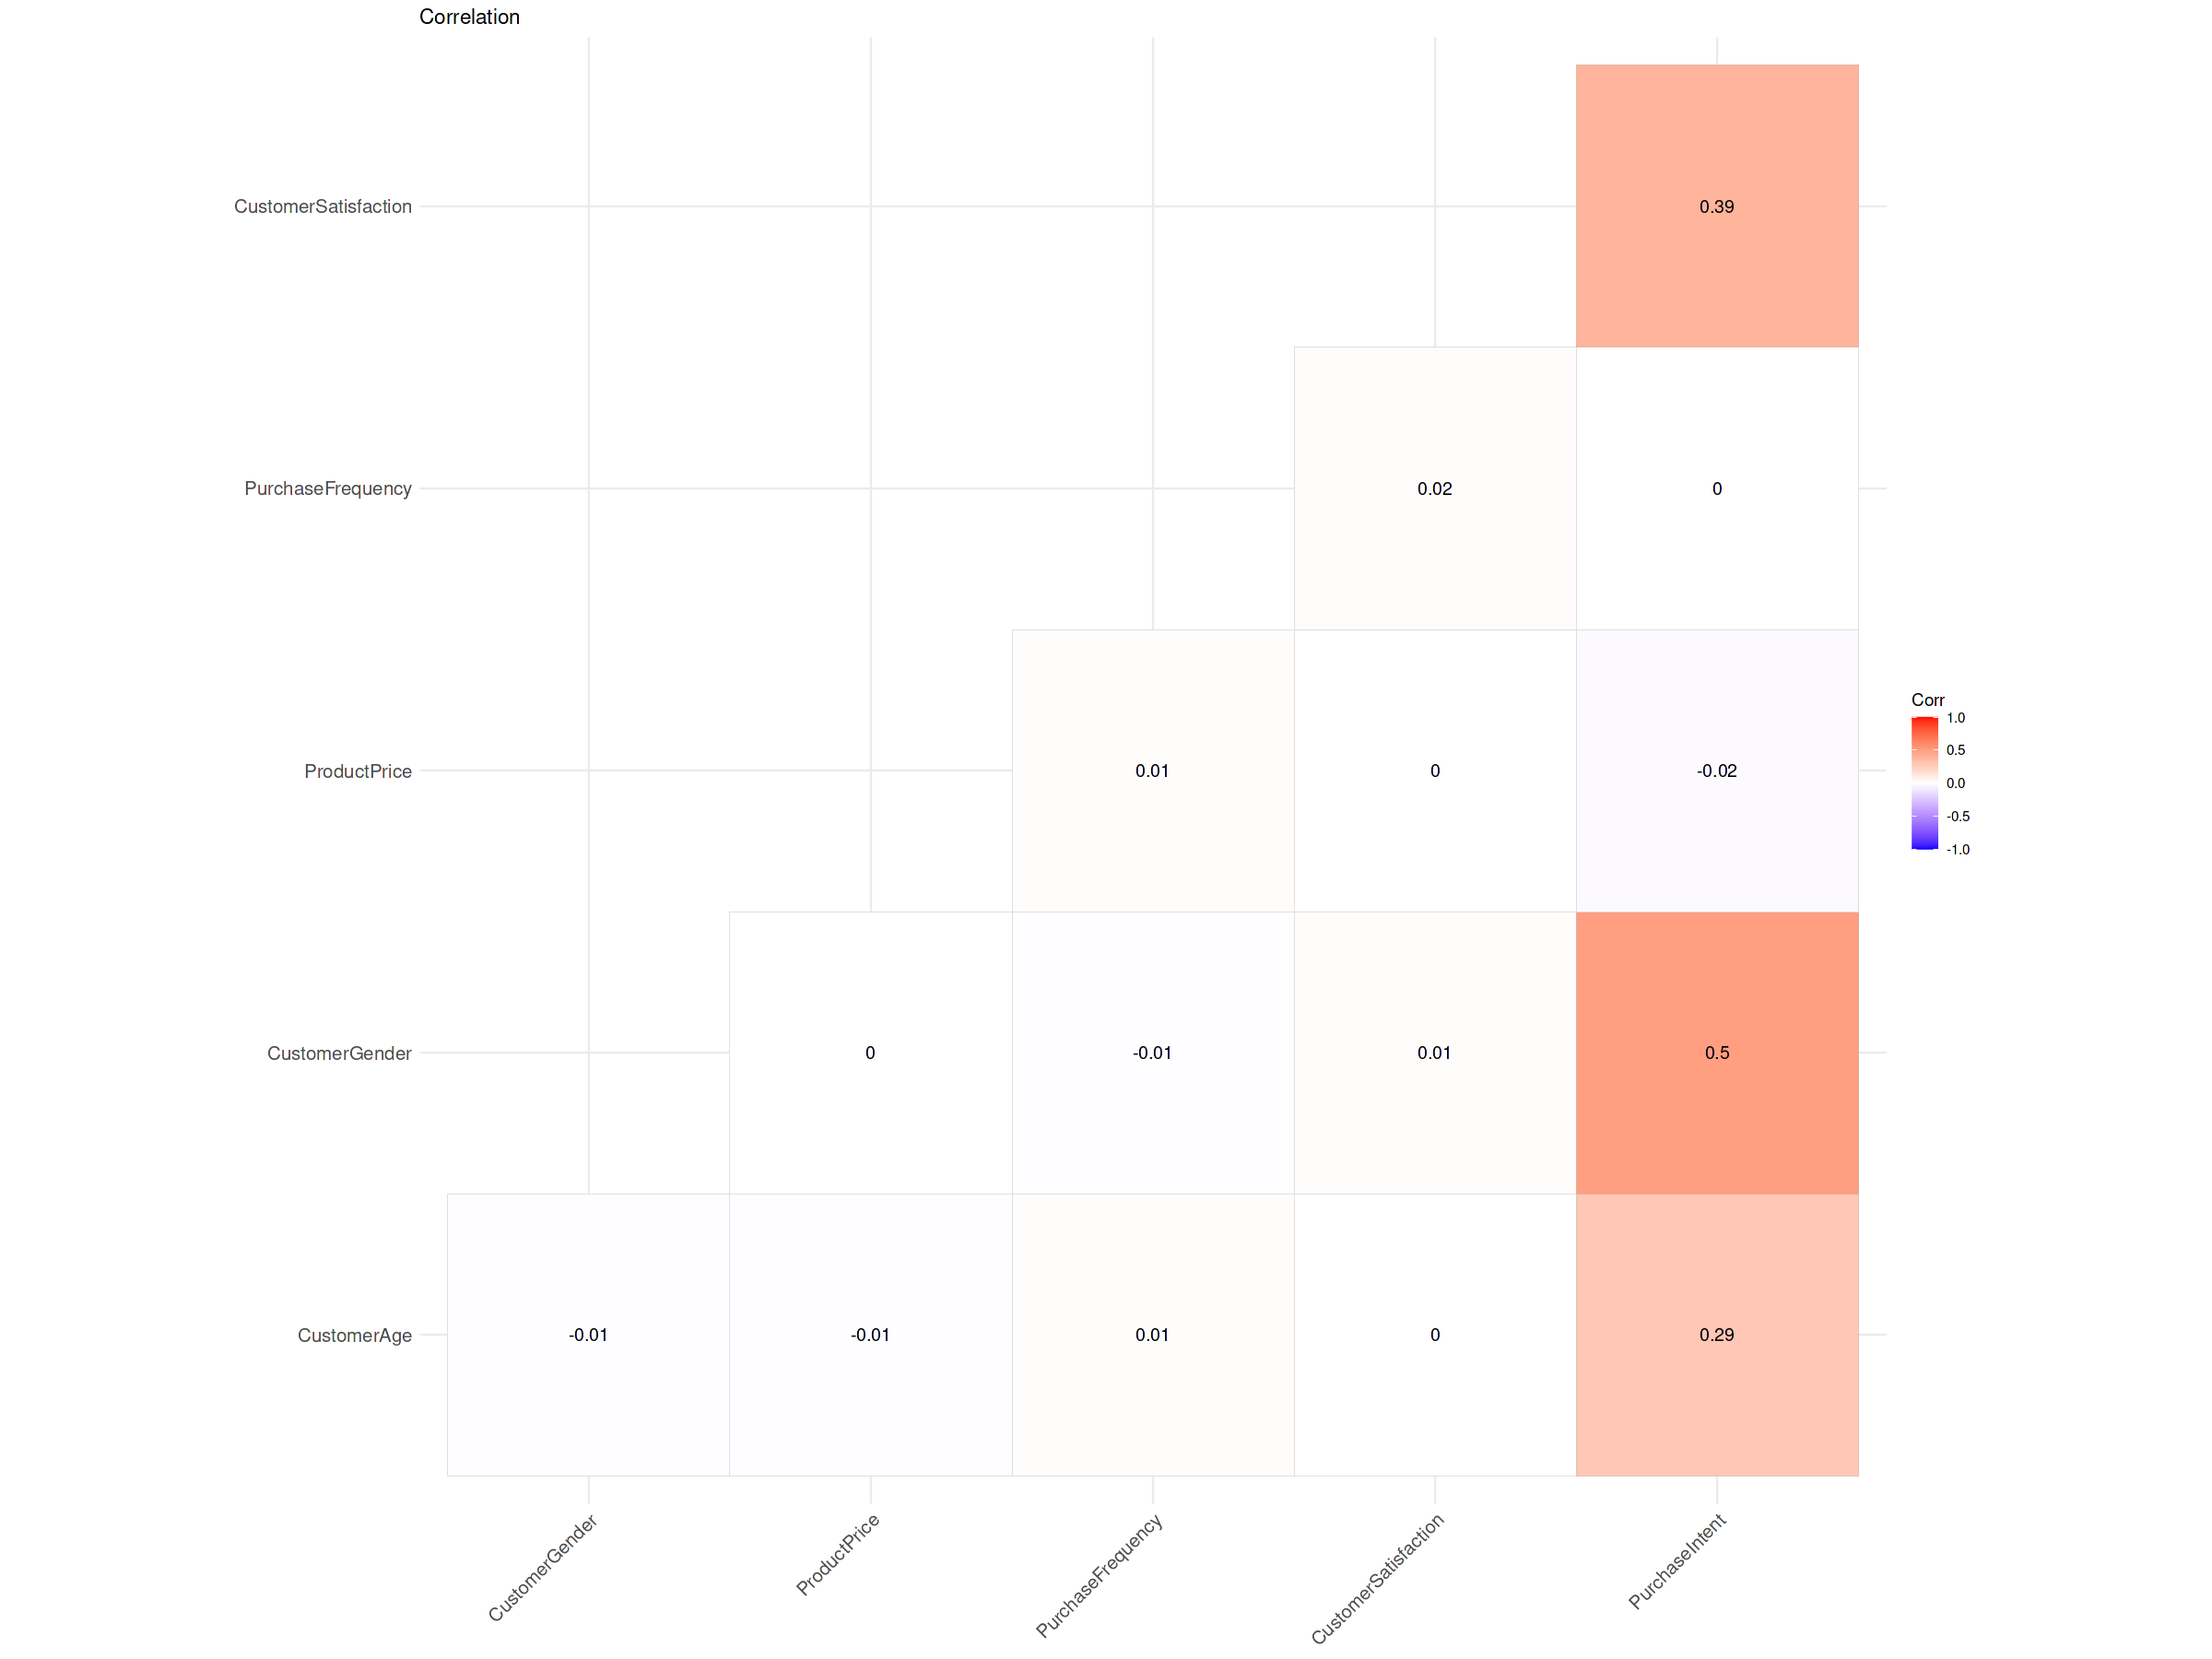

In [140]:
ggcorrplot(cor(data[,num_cols]) , type = "lower", lab=T, title = 'Correlation')

# **4. Modeling**

In [141]:
library(randomForest)
library(Metrics)
library(caret)
library(mltools)
library(data.table)
library(rpart)
library(e1071)

In [142]:
head(data)

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,5874,Smartphones,Other Brands,312.9497,18,0,2,1,0
2,5875,Smart Watches,Samsung,980.3894,35,1,7,2,1
3,5876,Tablets,Samsung,2606.7183,63,0,1,5,1
4,5877,Smartphones,Samsung,870.3955,63,1,10,3,1
5,5878,Tablets,Sony,1798.9559,57,0,17,3,0
6,5879,Smartphones,Samsung,373.1483,37,1,8,1,1


In [143]:
data <- data[,-1]

In [144]:
data$ProductCategory <- as.factor(data$ProductCategory)
data$ProductBrand <- as.factor(data$ProductBrand)

In [145]:
encoding_data <- one_hot(as.data.table(data))

In [146]:
head(encoding_data)

ProductCategory_Headphones,ProductCategory_Laptops,ProductCategory_Smart Watches,ProductCategory_Smartphones,ProductCategory_Tablets,ProductBrand_Apple,ProductBrand_HP,ProductBrand_Other Brands,ProductBrand_Samsung,ProductBrand_Sony,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
0,0,0,1,0,0,0,1,0,0,312.9497,18,0,2,1,0
0,0,1,0,0,0,0,0,1,0,980.3894,35,1,7,2,1
0,0,0,0,1,0,0,0,1,0,2606.7183,63,0,1,5,1
0,0,0,1,0,0,0,0,1,0,870.3955,63,1,10,3,1
0,0,0,0,1,0,0,0,0,1,1798.9559,57,0,17,3,0
0,0,0,1,0,0,0,0,1,0,373.1483,37,1,8,1,1


In [147]:
encoding_data <- encoding_data[,-16]

**MinMaxScale**

In [148]:
minmax <- function(x){
    return ((x-min(x))/(max(x)-min(x)))
}

In [149]:
encoding_data <- as.data.frame(lapply(encoding_data,minmax))

In [150]:
encoding_data$PurchaseIntent <- data$PurchaseIntent
encoding_data$PurchaseIntent <- as.factor(encoding_data$PurchaseIntent)

In [151]:
idx <- sample(nrow(encoding_data), 0.7 * nrow(encoding_data))
train <- encoding_data[idx,]
test <- encoding_data[-idx,]

**RandomForest**

In [152]:
RF <-  randomForest(PurchaseIntent ~. , data = train, ntree=300, type = "class")

In [153]:
RF


Call:
 randomForest(formula = PurchaseIntent ~ ., data = train, ntree = 300,      type = "class") 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 3

        OOB estimate of  error rate: 4.67%
Confusion matrix:
     0    1 class.error
0 2570  160  0.05860806
1  134 3436  0.03753501

In [154]:
pred_rf <- predict(RF,test,type = "class")

In [155]:
RF_cm <- confusionMatrix(pred_rf, reference = test$PurchaseIntent)

In [156]:
RF_cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1093   49
         1   79 1479
                                          
               Accuracy : 0.9526          
                 95% CI : (0.9439, 0.9603)
    No Information Rate : 0.5659          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9032          
                                          
 Mcnemar's Test P-Value : 0.01037         
                                          
            Sensitivity : 0.9326          
            Specificity : 0.9679          
         Pos Pred Value : 0.9571          
         Neg Pred Value : 0.9493          
             Prevalence : 0.4341          
         Detection Rate : 0.4048          
   Detection Prevalence : 0.4230          
      Balanced Accuracy : 0.9503          
                                          
       'Positive' Class : 0               
                        

In [157]:
RF$importance

,MeanDecreaseGini
ProductCategory_Headphones,10.63786
ProductCategory_Laptops,11.75044
ProductCategory_Smart.Watches,10.29561
ProductCategory_Smartphones,10.62675
ProductCategory_Tablets,10.21110
ProductBrand_Apple,11.02489
ProductBrand_HP,11.11392
ProductBrand_Other.Brands,10.21147
ProductBrand_Samsung,11.49647
ProductBrand_Sony,10.68586


**Logistic Regression**

In [158]:
LR <- glm(PurchaseIntent ~. , data = train, family = 'binomial')

In [159]:
summary(LR)


Call:
glm(formula = PurchaseIntent ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7637  -0.5193   0.1234   0.5283   3.3722  

Coefficients: (2 not defined because of singularities)
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -5.57836    0.20803 -26.815  < 2e-16 ***
ProductCategory_Headphones    -0.06943    0.11873  -0.585  0.55869    
ProductCategory_Laptops        0.02698    0.11849   0.228  0.81988    
ProductCategory_Smart.Watches -0.07107    0.11990  -0.593  0.55339    
ProductCategory_Smartphones    0.06594    0.11708   0.563  0.57334    
ProductCategory_Tablets             NA         NA      NA       NA    
ProductBrand_Apple            -0.10586    0.11892  -0.890  0.37334    
ProductBrand_HP                0.06641    0.11640   0.571  0.56827    
ProductBrand_Other.Brands     -0.05400    0.11812  -0.457  0.64759    
ProductBrand_Samsung          -0.08225    0.

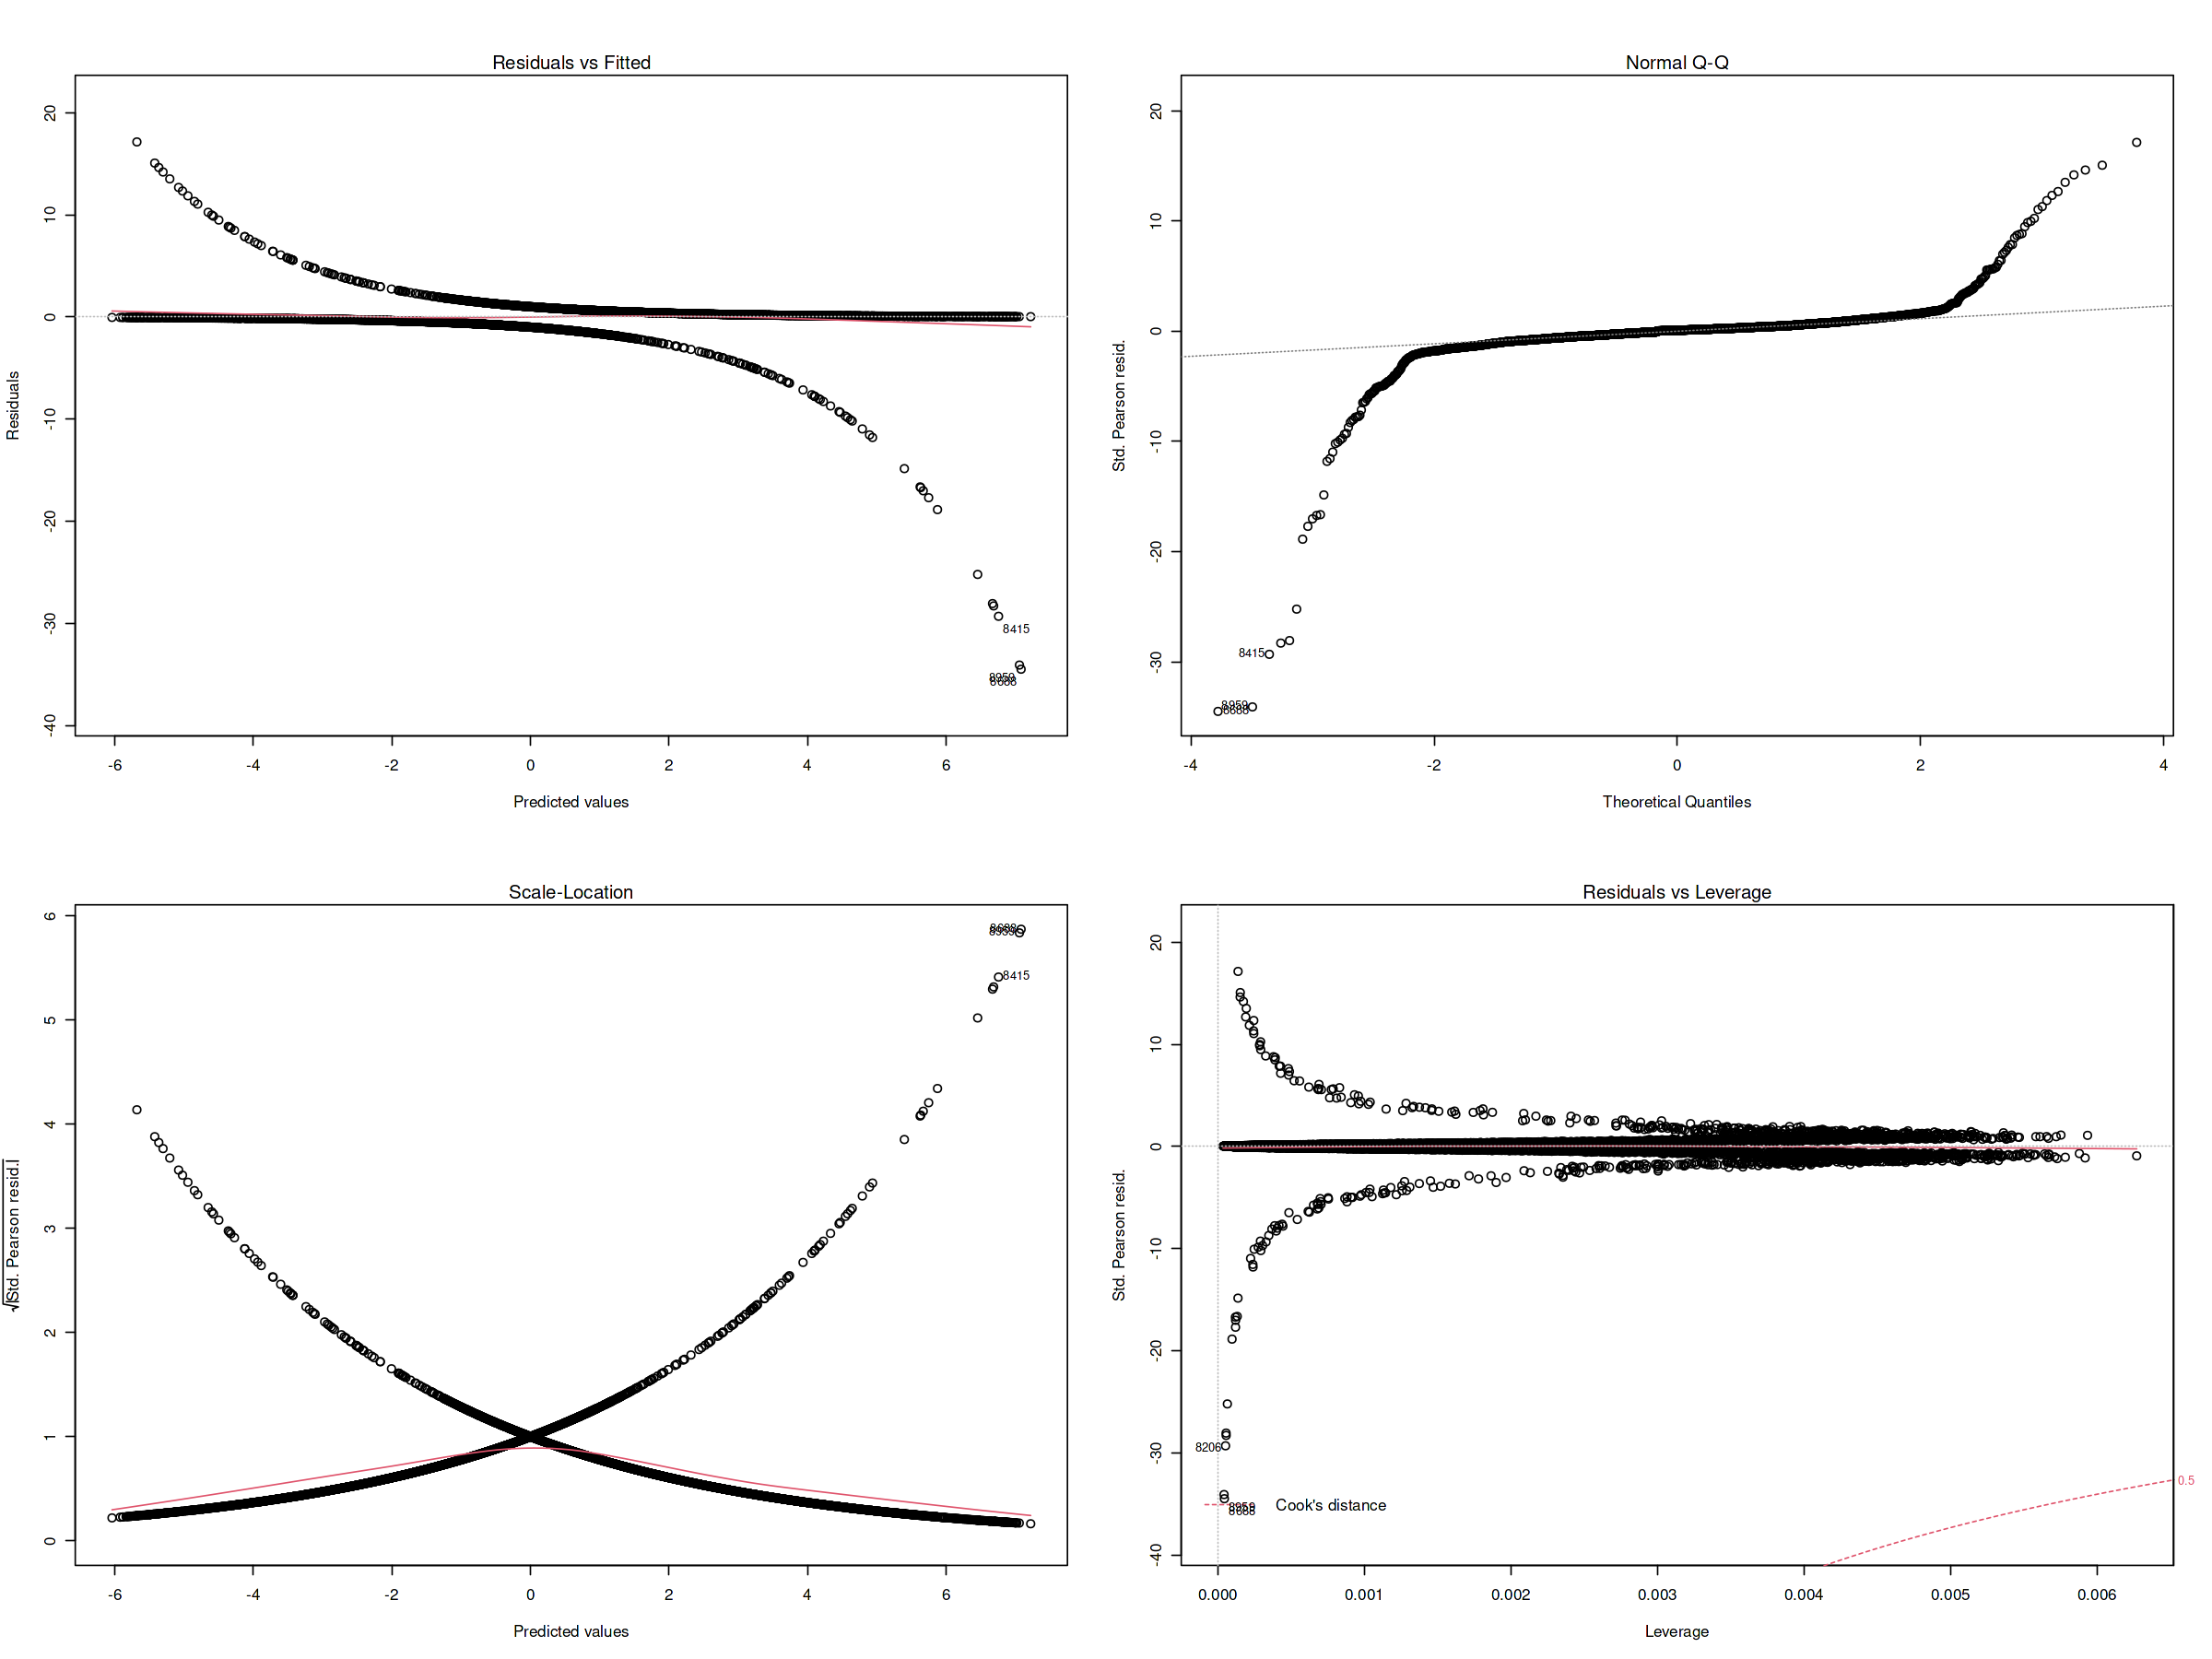

In [160]:
par(mfrow=c(2,2))
plot(LR)

In [161]:
best_model <- step(LR, direction = 'backward')

Start:  AIC=4557.87
PurchaseIntent ~ ProductCategory_Headphones + ProductCategory_Laptops + 
    ProductCategory_Smart.Watches + ProductCategory_Smartphones + 
    ProductCategory_Tablets + ProductBrand_Apple + ProductBrand_HP + 
    ProductBrand_Other.Brands + ProductBrand_Samsung + ProductBrand_Sony + 
    ProductPrice + CustomerAge + CustomerGender + PurchaseFrequency + 
    CustomerSatisfaction


Step:  AIC=4557.87
PurchaseIntent ~ ProductCategory_Headphones + ProductCategory_Laptops + 
    ProductCategory_Smart.Watches + ProductCategory_Smartphones + 
    ProductCategory_Tablets + ProductBrand_Apple + ProductBrand_HP + 
    ProductBrand_Other.Brands + ProductBrand_Samsung + ProductPrice + 
    CustomerAge + CustomerGender + PurchaseFrequency + CustomerSatisfaction


Step:  AIC=4557.87
PurchaseIntent ~ ProductCategory_Headphones + ProductCategory_Laptops + 
    ProductCategory_Smart.Watches + ProductCategory_Smartphones + 
    ProductBrand_Apple + ProductBrand_HP + ProductBrand_Oth

In [162]:
summary(best_model)


Call:
glm(formula = PurchaseIntent ~ ProductPrice + CustomerAge + CustomerGender + 
    CustomerSatisfaction, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7736  -0.5202   0.1234   0.5286   3.3728  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -5.5837     0.1661 -33.619  < 2e-16 ***
ProductPrice          -0.3660     0.1301  -2.813  0.00491 ** 
CustomerAge            4.2883     0.1549  27.680  < 2e-16 ***
CustomerGender         3.7975     0.1020  37.225  < 2e-16 ***
CustomerSatisfaction   4.6336     0.1421  32.607  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8621.3  on 6299  degrees of freedom
Residual deviance: 4534.8  on 6295  degrees of freedom
AIC: 4544.8

Number of Fisher Scoring iterations: 6


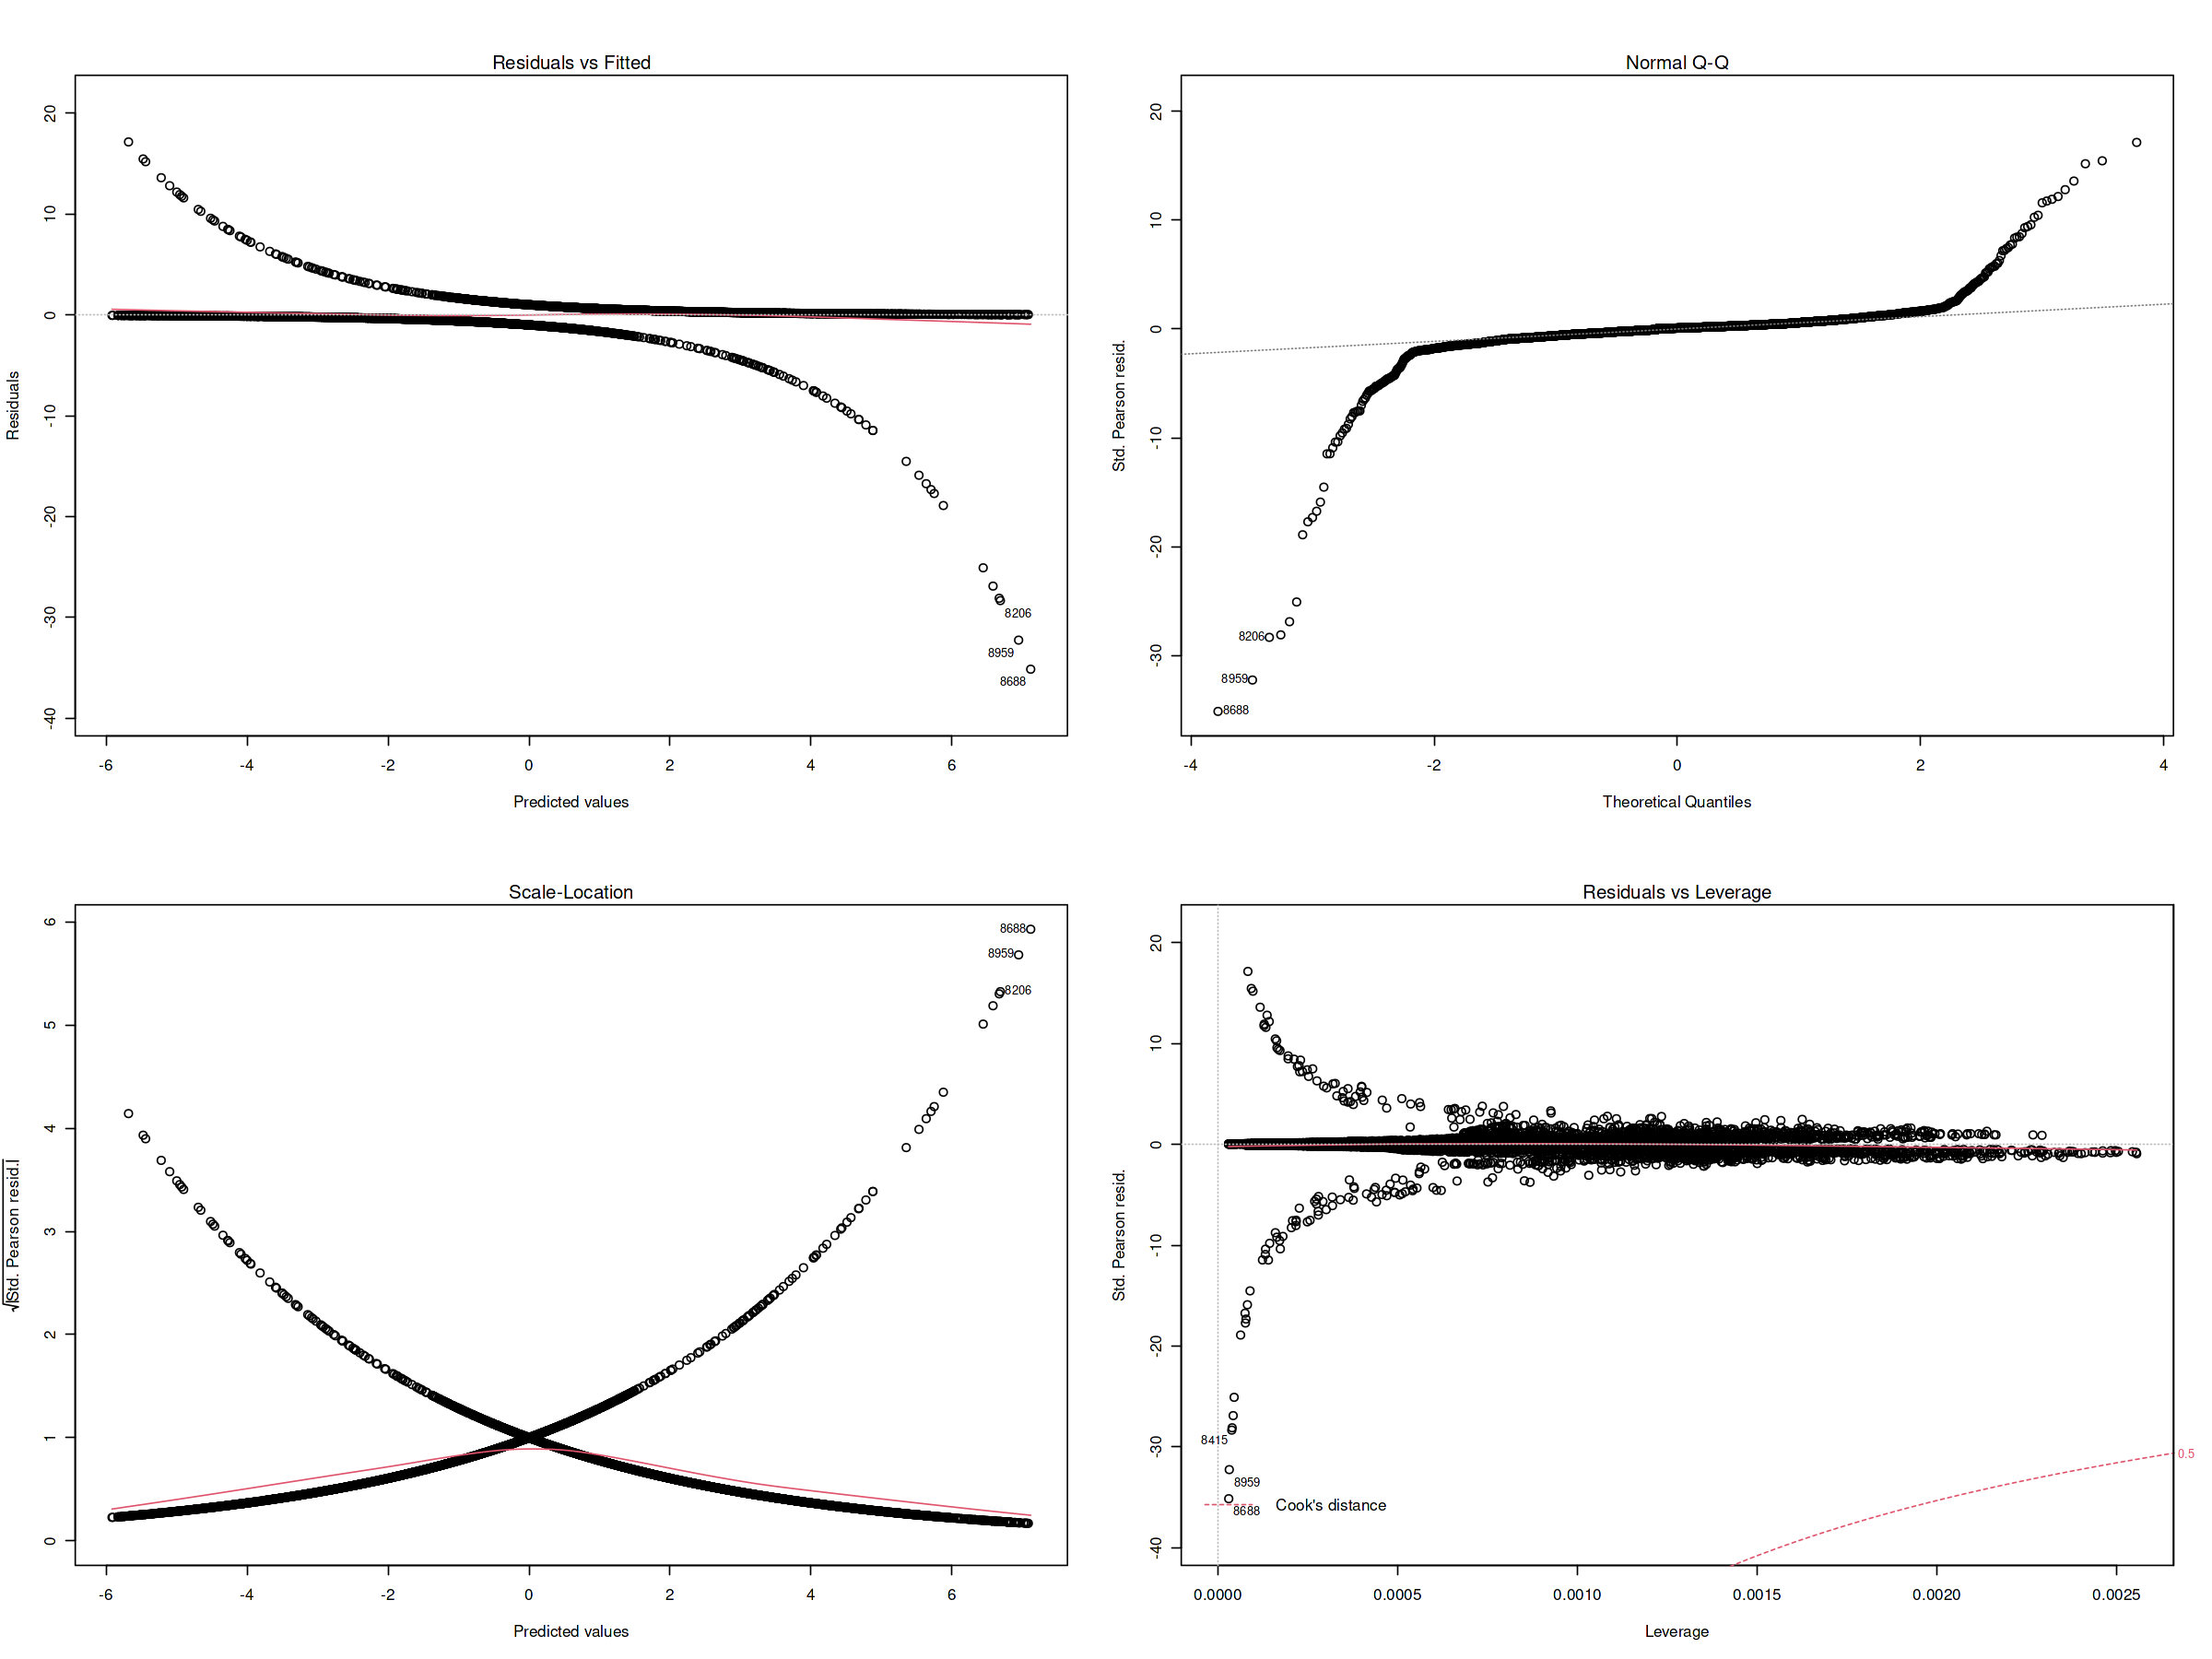

In [163]:
par(mfrow=c(2,2))
plot(best_model)

In [164]:
pred_LR <- round(predict(best_model, test, type = 'response'))

In [165]:
LR_cm <- confusionMatrix(factor(pred_LR), reference = factor(test$PurchaseIntent))

In [166]:
LR_cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0  956  165
         1  216 1363
                                          
               Accuracy : 0.8589          
                 95% CI : (0.8452, 0.8718)
    No Information Rate : 0.5659          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7113          
                                          
 Mcnemar's Test P-Value : 0.01042         
                                          
            Sensitivity : 0.8157          
            Specificity : 0.8920          
         Pos Pred Value : 0.8528          
         Neg Pred Value : 0.8632          
             Prevalence : 0.4341          
         Detection Rate : 0.3541          
   Detection Prevalence : 0.4152          
      Balanced Accuracy : 0.8539          
                                          
       'Positive' Class : 0               
                        

**DecisionTree**

In [167]:
tree <- rpart(PurchaseIntent ~ ., data= train, method = "class")

In [168]:
summary(tree)

Call:
rpart(formula = PurchaseIntent ~ ., data = train, method = "class")
  n= 6300 

          CP nsplit rel error    xerror        xstd
1 0.41391941      0 1.0000000 1.0000000 0.014407297
2 0.20989011      1 0.5860806 0.5860806 0.012655404
3 0.09963370      2 0.3761905 0.3761905 0.010739429
4 0.08443223      3 0.2765568 0.2765568 0.009442594
5 0.01000000      5 0.1076923 0.1076923 0.006132441

Variable importance
CustomerSatisfaction          CustomerAge       CustomerGender 
                  39                   29                   29 
        ProductPrice    PurchaseFrequency   ProductBrand_Apple 
                   1                    1                    1 
   ProductBrand_Sony 
                   1 

Node number 1: 6300 observations,    complexity param=0.4139194
  predicted class=1  expected loss=0.4333333  P(node) =1
    class counts:  2730  3570
   probabilities: 0.433 0.567 
  left son=2 (3128 obs) right son=3 (3172 obs)
  Primary splits:
      CustomerGender       < 0.5 

In [169]:
printcp(tree)


Classification tree:
rpart(formula = PurchaseIntent ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] CustomerAge          CustomerGender       CustomerSatisfaction

Root node error: 2730/6300 = 0.43333

n= 6300 

        CP nsplit rel error  xerror      xstd
1 0.413919      0   1.00000 1.00000 0.0144073
2 0.209890      1   0.58608 0.58608 0.0126554
3 0.099634      2   0.37619 0.37619 0.0107394
4 0.084432      3   0.27656 0.27656 0.0094426
5 0.010000      5   0.10769 0.10769 0.0061324


In [170]:
pred_tree <- predict(tree, test , type = 'class')

In [171]:
tree_cm <- confusionMatrix(factor(pred_tree), reference = factor(test$PurchaseIntent))

In [172]:
tree_cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1093   49
         1   79 1479
                                          
               Accuracy : 0.9526          
                 95% CI : (0.9439, 0.9603)
    No Information Rate : 0.5659          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9032          
                                          
 Mcnemar's Test P-Value : 0.01037         
                                          
            Sensitivity : 0.9326          
            Specificity : 0.9679          
         Pos Pred Value : 0.9571          
         Neg Pred Value : 0.9493          
             Prevalence : 0.4341          
         Detection Rate : 0.4048          
   Detection Prevalence : 0.4230          
      Balanced Accuracy : 0.9503          
                                          
       'Positive' Class : 0               
                        

In [173]:
tree$control

$minsplit
[1] 20

$minbucket
[1] 7

$cp
[1] 0.01

$maxcompete
[1] 4

$maxsurrogate
[1] 5

$usesurrogate
[1] 2

$surrogatestyle
[1] 0

$maxdepth
[1] 30

$xval
[1] 10

**SVM**

In [174]:
SVM_ <- svm(PurchaseIntent~., data = train,type="C-classification",kernel = "radial", cost=10 , gamma=0.1)

In [175]:
summary(SVM_)


Call:
svm(formula = PurchaseIntent ~ ., data = train, type = "C-classification", 
    kernel = "radial", cost = 10, gamma = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 

Number of Support Vectors:  1791

 ( 920 871 )


Number of Classes:  2 

Levels: 
 0 1




In [176]:
pred_svm <- predict(SVM_,test)

In [177]:
svm_cm <- confusionMatrix(pred_svm,reference = test$PurchaseIntent)

In [178]:
svm_cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1053  101
         1  119 1427
                                          
               Accuracy : 0.9185          
                 95% CI : (0.9076, 0.9286)
    No Information Rate : 0.5659          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8339          
                                          
 Mcnemar's Test P-Value : 0.2517          
                                          
            Sensitivity : 0.8985          
            Specificity : 0.9339          
         Pos Pred Value : 0.9125          
         Neg Pred Value : 0.9230          
             Prevalence : 0.4341          
         Detection Rate : 0.3900          
   Detection Prevalence : 0.4274          
      Balanced Accuracy : 0.9162          
                                          
       'Positive' Class : 0               
                        

# **5. Evaluation**

In [179]:
acc <- data.frame(model = c('RF','LR','DT','SVM') , Accuracy = c(RF_cm$overall[1], LR_cm$overall[1], tree_cm$overall[1], svm_cm$overall[1]))

In [180]:
acc

model,Accuracy
<chr>,<dbl>
RF,0.9525926
LR,0.8588889
DT,0.9525926
SVM,0.9185185


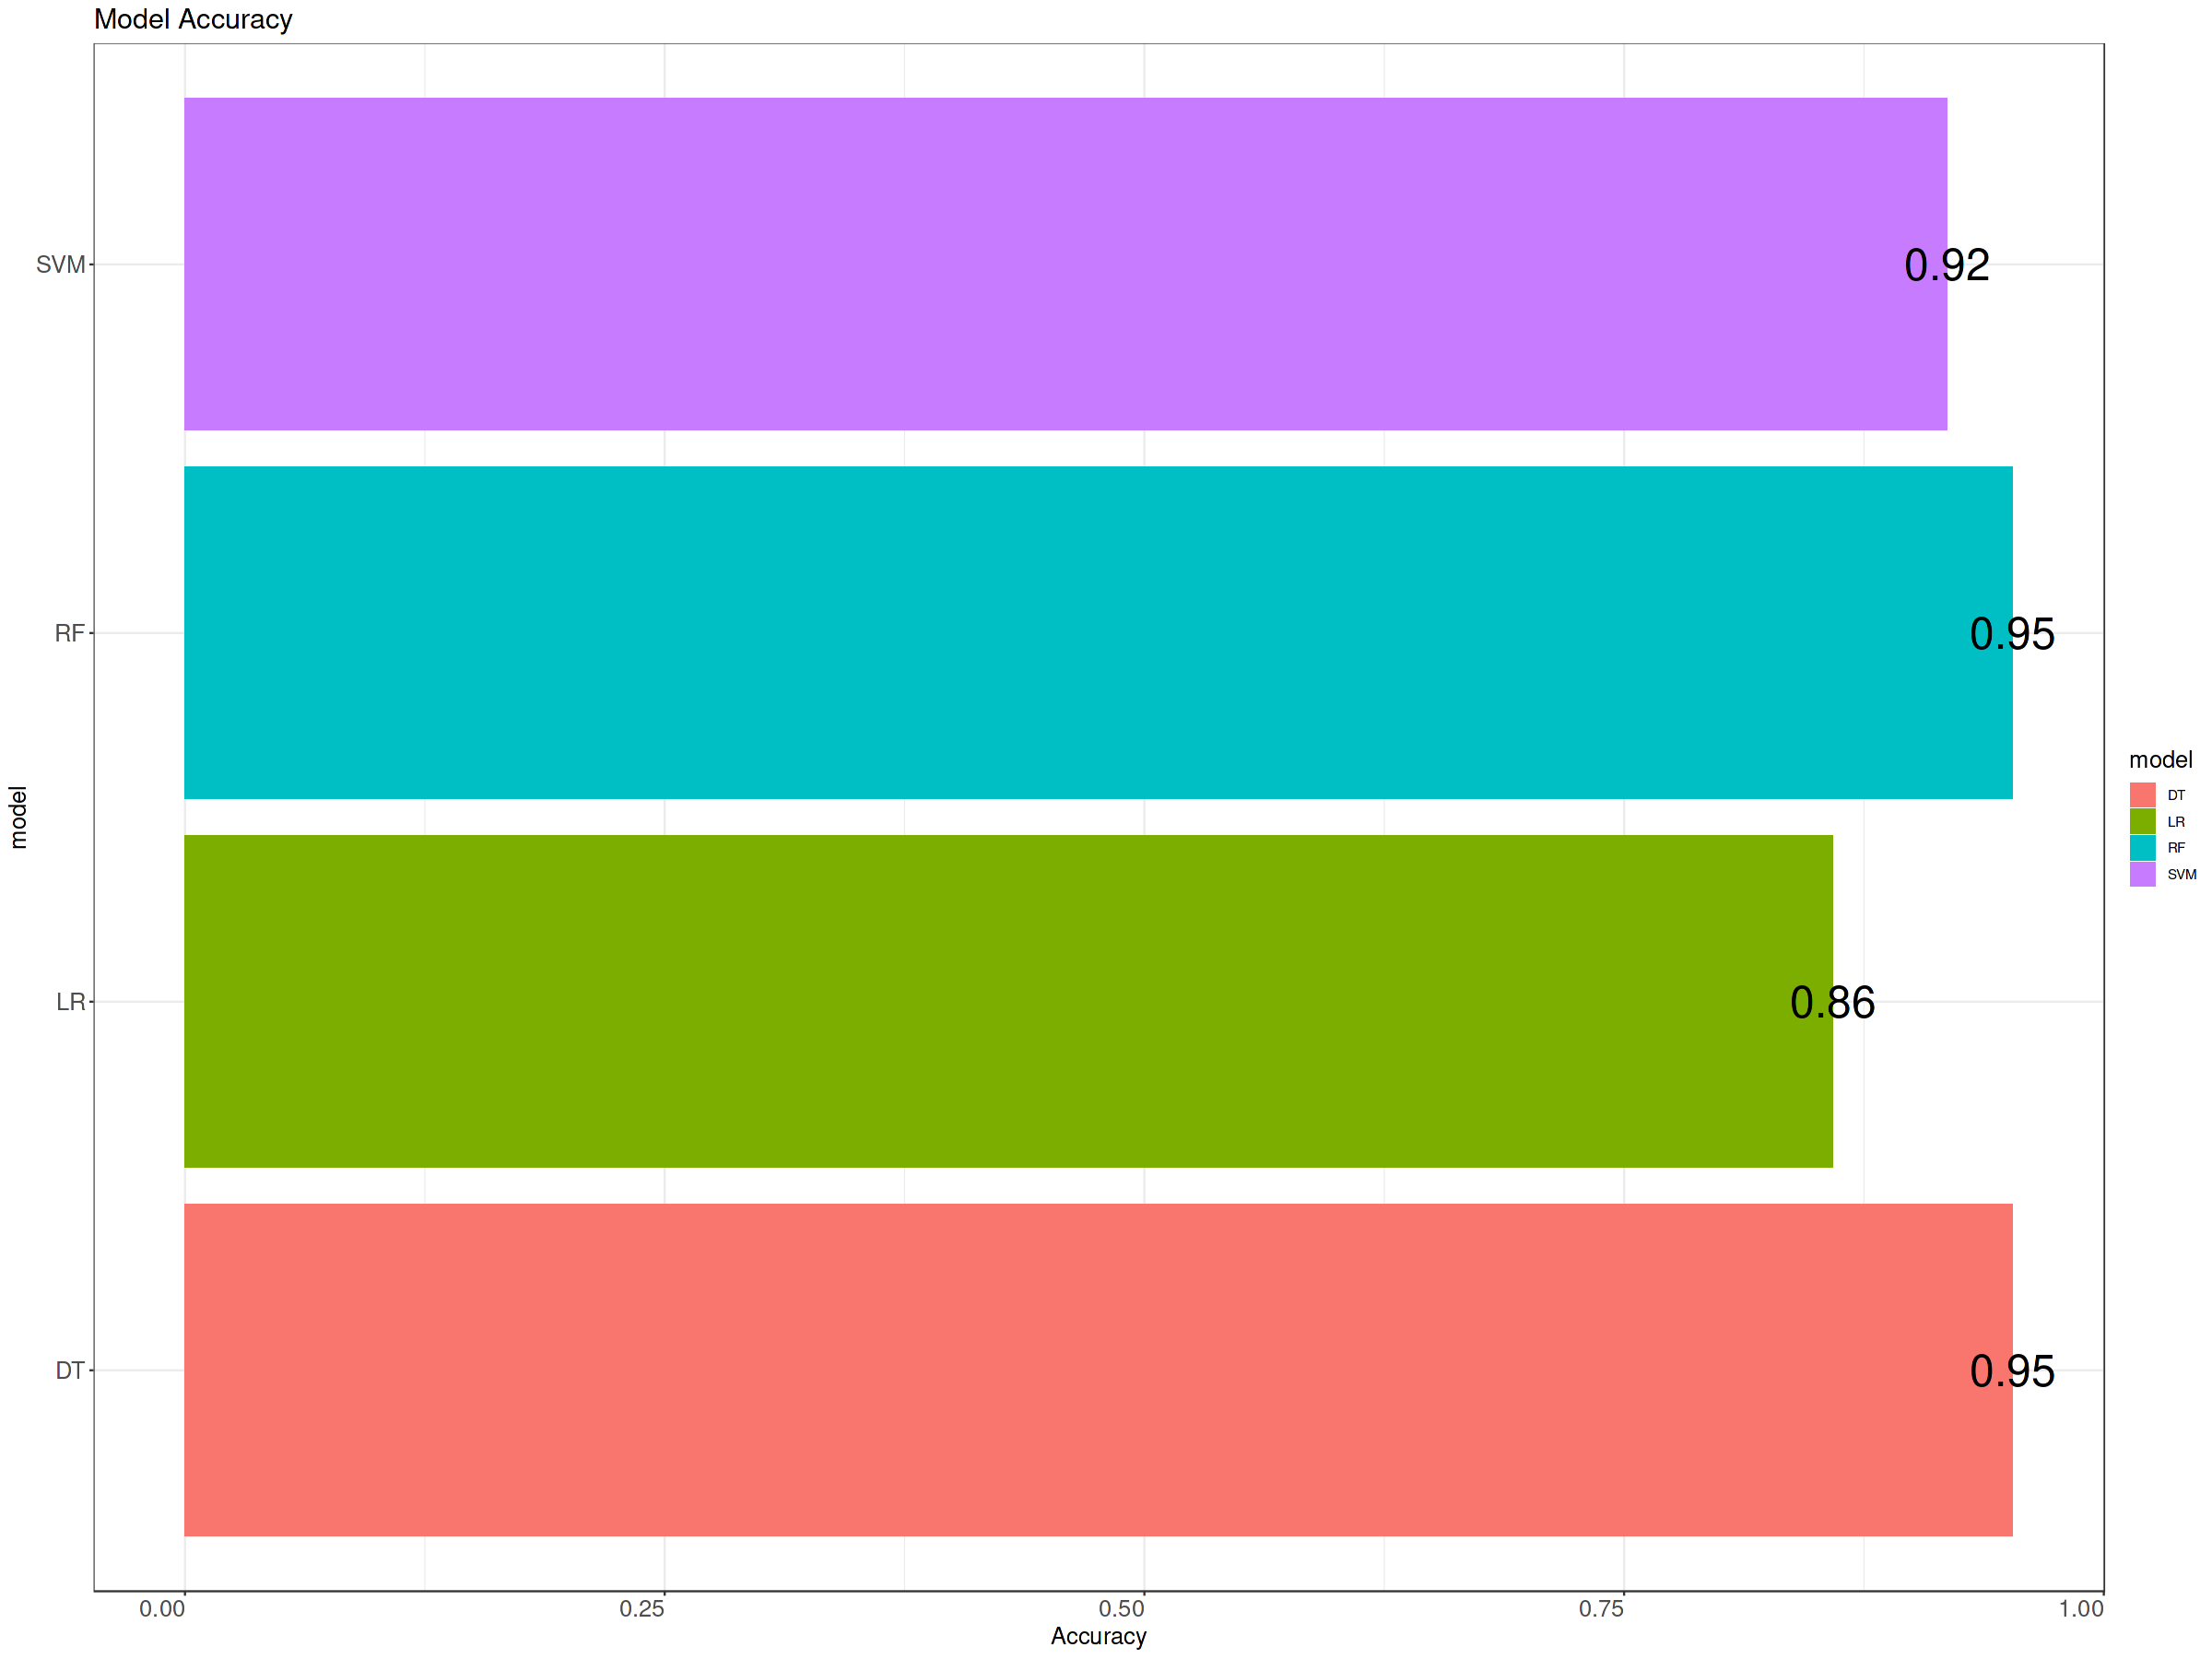

In [181]:
ggplot(acc) + geom_col(aes(y=model , x= Accuracy , fill = model)) +
    geom_text(aes(y = model , x= Accuracy, label= round(Accuracy,2)), hjust=0.5, size = 10) +
    theme_bw() +
    ggtitle('Model Accuracy') + 
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

**RF Model & DT Model is best model.**

------------
**Please leave your advice in the comments. Thank you**